# DCGAN PYTORCH IMPLEMENTATION
Forked from here: https://github.com/pytorch/examples

This is based off of the DCGAN Pytorch implementation above.  Slight Edits made by Sydney Ayers

Upload MovieFiles Big (included).  There should be 1728 images.  Continue as normal.  

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
from __future__ import print_function
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable

from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np


In [0]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    npimg = npimg-np.amin(npimg)
    npimg = npimg/np.amax(npimg)
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.axis("off")
        
    plt.show()

In [5]:
from google.colab import files
files.upload()

Saving MoviePostersBig.zip to MoviePostersBig.zip


In [4]:
ls

datalab/        __MACOSX/         MoviePostersBig.zip  subset/
dcgan_results/  MoviePostersBig/  results.zip          subset.zip


In [7]:
!unzip MoviePostersBig.zip

Archive:  MoviePostersBig.zip
   creating: MoviePostersBig/
  inflating: MoviePostersBig/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/MoviePostersBig/
  inflating: __MACOSX/MoviePostersBig/._.DS_Store  
   creating: MoviePostersBig/00s/
  inflating: MoviePostersBig/00s/MV5BM2QyYmRlNjAtYTIzMC00Zjk5LWFmNTYtYzIxZDc2OTFiNmZiXkEyXkFqcGdeQXVyMTMxMTY0OTQ@._V1_UY268_CR9,0,182,268_AL_.jpg  
   creating: __MACOSX/MoviePostersBig/00s/
  inflating: __MACOSX/MoviePostersBig/00s/._MV5BM2QyYmRlNjAtYTIzMC00Zjk5LWFmNTYtYzIxZDc2OTFiNmZiXkEyXkFqcGdeQXVyMTMxMTY0OTQ@._V1_UY268_CR9,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/00s/MV5BMDBiODQ4OGItNDlkMy00MDNmLWI2NjUtMjQ1NTlkZTUwOTg1XkEyXkFqcGdeQXVyMTQ0MzMwNQ@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/00s/._MV5BMDBiODQ4OGItNDlkMy00MDNmLWI2NjUtMjQ1NTlkZTUwOTg1XkEyXkFqcGdeQXVyMTQ0MzMwNQ@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/00s/MV5BMDBjNGUyY2UtOTk5Ny00Y2Q4LTgyZTItNzZhNWNmZGE4YTU3XkEyXkFqc


  inflating: __MACOSX/MoviePostersBig/00s/._MV5BMTk1MjQwMTQyMV5BMl5BanBnXkFtZTcwODcxMjEzMw@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/00s/MV5BMTk1MmI2YzgtNjcxNi00OGE1LThmOTktZTRkNzdjODliYzk2XkEyXkFqcGdeQXVyNTA1NDY3NzY@._V1_UY268_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/00s/._MV5BMTk1MmI2YzgtNjcxNi00OGE1LThmOTktZTRkNzdjODliYzk2XkEyXkFqcGdeQXVyNTA1NDY3NzY@._V1_UY268_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/00s/MV5BMTk1NzE1NDk4Ml5BMl5BanBnXkFtZTgwNTIwMzcwMzE@._V1_UY268_CR4,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/00s/._MV5BMTk1NzE1NDk4Ml5BMl5BanBnXkFtZTgwNTIwMzcwMzE@._V1_UY268_CR4,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/00s/MV5BMTk3OTc2ODA4N15BMl5BanBnXkFtZTgwOTM1NDk5NTE@._V1_UY268_CR9,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/00s/._MV5BMTk3OTc2ODA4N15BMl5BanBnXkFtZTgwOTM1NDk5NTE@._V1_UY268_CR9,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/00s/MV5BMTk4NTczNzA0Ml5BMl5BanBnXkFtZTcwODM5MDgzMQ


  inflating: __MACOSX/MoviePostersBig/10s/._MV5BMjA3MjM5ODUyOV5BMl5BanBnXkFtZTcwOTQ5ODY3Ng@@._V1_UY268_CR5,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BMjA3MzE4NjkyNV5BMl5BanBnXkFtZTgwMTA0NjM4MzE@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BMjA3MzE4NjkyNV5BMl5BanBnXkFtZTgwMTA0NjM4MzE@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BMjA3Y2NkMDMtN2I1Zi00ZjMxLTkzMTktNjBiN2IyYzVjNGMyXkEyXkFqcGdeQXVyNDExNzUxNzg@._V1_UY268_CR157,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BMjA3Y2NkMDMtN2I1Zi00ZjMxLTkzMTktNjBiN2IyYzVjNGMyXkEyXkFqcGdeQXVyNDExNzUxNzg@._V1_UY268_CR157,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BMjA4MjYwNzkxMl5BMl5BanBnXkFtZTcwMjEzODY5Ng@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BMjA4MjYwNzkxMl5BMl5BanBnXkFtZTcwMjEzODY5Ng@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BMjA4OTE0Mjk2M15BMl5BanBnXkFtZTcwNTQ4OT


  inflating: __MACOSX/MoviePostersBig/10s/._MV5BMTkwOTM5MzM3OF5BMl5BanBnXkFtZTgwMTk0Njg1NDE@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BMTkxNzQzMTQxOF5BMl5BanBnXkFtZTcwNzc3MzU0Mw@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BMTkxNzQzMTQxOF5BMl5BanBnXkFtZTcwNzc3MzU0Mw@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BMTkyMjMxNjM0OF5BMl5BanBnXkFtZTgwNjEyMzY5MDE@._V1_UY268_CR4,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BMTkyMjMxNjM0OF5BMl5BanBnXkFtZTgwNjEyMzY5MDE@._V1_UY268_CR4,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BMTkyNDgzODE3NV5BMl5BanBnXkFtZTgwNDQ4ODYxNDE@._V1_UY268_CR16,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BMTkyNDgzODE3NV5BMl5BanBnXkFtZTgwNDQ4ODYxNDE@._V1_UY268_CR16,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BMTkyNTk3OTcyMF5BMl5BanBnXkFtZTgwNDQ5NTA2MDE@._V1_UY268_CR9,0,182,268_AL_.jpg  
  inflating: __MACOSX/Mov


  inflating: __MACOSX/MoviePostersBig/10s/._MV5BNjZhOGE3MTMtODgyYS00ZTRlLTk0ZjAtZWVhOTNmYmQyMTIzXkEyXkFqcGdeQXVyMjIzMTg3NzU@._V1_UY268_CR2,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BNmE3ZTMzODMtNzA3Ny00ZjNiLWJkODQtMjU4Yjc2OTJlZDFmXkEyXkFqcGdeQXVyMjQyOTAzMDc@._V1_UY268_CR4,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BNmE3ZTMzODMtNzA3Ny00ZjNiLWJkODQtMjU4Yjc2OTJlZDFmXkEyXkFqcGdeQXVyMjQyOTAzMDc@._V1_UY268_CR4,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BNmI2YjQ4ZWQtMmYxOS00MTljLTg4YzItODBjYzc5YWZiNGM0XkEyXkFqcGdeQXVyMjY4MjM5MTE@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BNmI2YjQ4ZWQtMmYxOS00MTljLTg4YzItODBjYzc5YWZiNGM0XkEyXkFqcGdeQXVyMjY4MjM5MTE@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BNmRiZjRiYjktYmY0Yi00ZTBhLWEzZDUtNjFiYTgyZDQ4OWNlXkEyXkFqcGdeQXVyNDc1MzI2NjI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BNmRiZjRiYjktYmY0Yi00ZTBhLWEzZD


  inflating: __MACOSX/MoviePostersBig/10s/._MV5BZWUxZjNmODYtZTA4MS00YTQwLWFmZTAtMjVlOTlkZmEwOThkXkEyXkFqcGdeQXVyMjY3NTQ0Mzk@._V1_UY268_CR2,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BZWVmMmFhZjAtNDQ1MS00NjU0LWFmZTgtOTM1YzQ1YWRmZTVhXkEyXkFqcGdeQXVyMTkzMDQxOA@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BZWVmMmFhZjAtNDQ1MS00NjU0LWFmZTgtOTM1YzQ1YWRmZTVhXkEyXkFqcGdeQXVyMTkzMDQxOA@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/10s/MV5BZWYxNzQ3OTctNTYwMy00ZGM5LWE4NTMtNjY2ZDljZWFiYTM1XkEyXkFqcGdeQXVyMTk2NjMxMDU@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/10s/._MV5BZWYxNzQ3OTctNTYwMy00ZGM5LWE4NTMtNjY2ZDljZWFiYTM1XkEyXkFqcGdeQXVyMTk2NjMxMDU@._V1_UX182_CR0,0,182,268_AL_.jpg  
   creating: MoviePostersBig/50s/
  inflating: MoviePostersBig/50s/.DS_Store  
   creating: __MACOSX/MoviePostersBig/50s/
  inflating: __MACOSX/MoviePostersBig/50s/._.DS_Store  
  inflating: MoviePostersBig/50s/MV5BM2Q4NGEzMjM

  inflating: MoviePostersBig/60s/MV5BMGE5MzM4NDItZTgwNy00MDBjLWI2ODQtNzVjMzBhMjVhMjkyXkEyXkFqcGdeQXVyMjI4MjA5MzA@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/60s/._MV5BMGE5MzM4NDItZTgwNy00MDBjLWI2ODQtNzVjMzBhMjVhMjkyXkEyXkFqcGdeQXVyMjI4MjA5MzA@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/60s/MV5BMGQwYzEyOTUtY2QxZS00YjMzLTg0ZTUtN2VkY2QxOThhMTViXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/60s/._MV5BMGQwYzEyOTUtY2QxZS00YjMzLTg0ZTUtN2VkY2QxOThhMTViXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/60s/MV5BMGU5ZDViZmMtMzYwYy00YzFkLWEzYTktNjZhOGQ5ODA0ODcwXkEyXkFqcGdeQXVyMDUyOTUyNQ@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/60s/._MV5BMGU5ZDViZmMtMzYwYy00YzFkLWEzYTktNjZhOGQ5ODA0ODcwXkEyXkFqcGdeQXVyMDUyOTUyNQ@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/60s/MV5BMGY0ODM0NjctZDU4OS00NmNlLWExZGUtY2E3ZjkyNW

  inflating: __MACOSX/MoviePostersBig/70s/._MV5BMTIzMWNkZWQtYzgwYi00M2ZmLTk3MmMtN2Q3ZmMyN2IyNmQzXkEyXkFqcGdeQXVyMTQ2MjQyNDc@._V1_UY268_CR8,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/70s/MV5BMTIzNjk3MzI4OV5BMl5BanBnXkFtZTcwNzY1MzAwMQ@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/70s/._MV5BMTIzNjk3MzI4OV5BMl5BanBnXkFtZTcwNzY1MzAwMQ@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/70s/MV5BMTk1OTEzMDY3OF5BMl5BanBnXkFtZTYwMjMzMjg5._V1_UY268_CR3,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/70s/._MV5BMTk1OTEzMDY3OF5BMl5BanBnXkFtZTYwMjMzMjg5._V1_UY268_CR3,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/70s/MV5BMTM5MTU2ZTctODVhMi00YWY2LWEzNWMtYjY0MDU4ZWY5ODBjXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/70s/._MV5BMTM5MTU2ZTctODVhMi00YWY2LWEzNWMtYjY0MDU4ZWY5ODBjXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/70s/MV5BMTMwMTU2NjIwNV5BMl5

  inflating: MoviePostersBig/80s/MV5BNjQ0M2Y3ODktOTZhOC00Yzg4LWE5NGQtMDQyMmRjOWQzYTYxXkEyXkFqcGdeQXVyNTQ4ODA2NzQ@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/80s/._MV5BNjQ0M2Y3ODktOTZhOC00Yzg4LWE5NGQtMDQyMmRjOWQzYTYxXkEyXkFqcGdeQXVyNTQ4ODA2NzQ@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/80s/MV5BNjQwYjEwYmYtZTkwNC00NDQ3LTkwNzUtYjNmYmNmYWEzZjNkXkEyXkFqcGdeQXVyNDY2NzgwOTE@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/80s/._MV5BNjQwYjEwYmYtZTkwNC00NDQ3LTkwNzUtYjNmYmNmYWEzZjNkXkEyXkFqcGdeQXVyNDY2NzgwOTE@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/80s/MV5BNjVlNzFjMGItMTEwYy00OTc0LWFmY2ItM2U0MmQyYWI5Njk3XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/80s/._MV5BNjVlNzFjMGItMTEwYy00OTc0LWFmY2ItM2U0MmQyYWI5Njk3XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/80s/MV5BNjY4OTRhODktMWYwZC00MGFjLWIzZmUtYTJiYTUyMW


  inflating: MoviePostersBig/90s/MV5BMTYxOTg2NTY5NV5BMl5BanBnXkFtZTcwMDQ0ODAwMQ@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/90s/._MV5BMTYxOTg2NTY5NV5BMl5BanBnXkFtZTcwMDQ0ODAwMQ@@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/90s/MV5BMTYyMTBlM2UtNWE1Ni00ZDg4LTliODQtYTFhZWIwNTAyNTg3L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/90s/._MV5BMTYyMTBlM2UtNWE1Ni00ZDg4LTliODQtYTFhZWIwNTAyNTg3L2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/90s/MV5BMTYyNDg2Mzg5MF5BMl5BanBnXkFtZTYwMTQxNjk4._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/90s/._MV5BMTYyNDg2Mzg5MF5BMl5BanBnXkFtZTYwMTQxNjk4._V1_UX182_CR0,0,182,268_AL_.jpg  
  inflating: MoviePostersBig/90s/MV5BMTYyNjI3ODIxNF5BMl5BanBnXkFtZTcwMDcwMTAwMQ@@._V1_UY268_CR3,0,182,268_AL_.jpg  
  inflating: __MACOSX/MoviePostersBig/90s/._MV5BMTYyNjI3ODIxNF5BMl

In [0]:
mkdir dcgan_results

In [0]:
# We will save the results here
outf="./dcgan_results"

In [6]:
#manualSeed = random.randint(1, 10000)
manualSeed = 4532
print("Random Seed: ", manualSeed)
random.seed(manualSeed)

torch.manual_seed(manualSeed)
cudnn.benchmark = True

use_cuda=True
if use_cuda:
    torch.cuda.manual_seed_all(manualSeed)

if torch.cuda.is_available() and not use_cuda:
    print("WARNING: You have a CUDA device, so you should probably run with --cuda")

Random Seed:  4532


In [14]:
ls

datalab/  dcgan_results/  __MACOSX/  MoviePostersBig/  MoviePostersBig.zip


You will need to download an image dataset and put them into a folder.
The "flowers" dataset, for example, can be found here:
http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Usually you need at least a few thousand images to get reasonable results
    

In [7]:
imageSize = 64 # square images for now!
dataroot = "MoviePostersBig"
#dataroot = "./geom_pics_dataset"

# folder dataset
dataset = dset.ImageFolder(root=dataroot,
                               transform=transforms.Compose([
                                   transforms.Scale(imageSize),
                                   transforms.CenterCrop(imageSize),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               ]))

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [0]:
batchSize= 32
workers = 2
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batchSize, shuffle=True, num_workers=int(workers))

In [9]:
print('num of batches:', dataloader.__len__())
print('num Of Images:', dataloader.__len__()*batchSize)

num of batches: 54
num Of Images: 1728


In [10]:
# this example demonstrates how we can load a new batch of data
dataiter = iter(dataloader)
data= dataiter.next()
data[0]=(data[0]+1)/2
print(len(data))
print(data[0].size(),data[1].size())

2
torch.Size([32, 3, 64, 64]) torch.Size([32])


In [11]:
#labels are in data[1][:]
data[1][0:5]


 1
 0
 1
 1
 3
[torch.LongTensor of size 5]

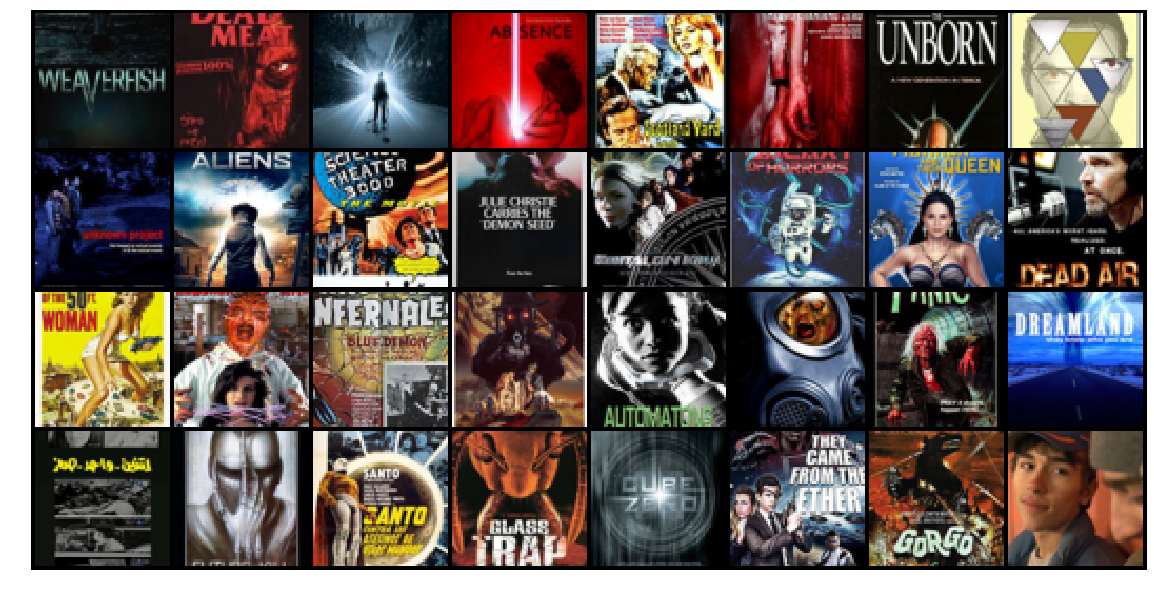

In [14]:
# show some examples from the original data
# images are in data[0][:]
show(make_grid(data[0]))


In [0]:
ngpu = int(1) # use one GPU
nz = int(100) # code dimension (This is the() random noise) input dimension of the generator network)
ngf = int(64) # output dimension of the generator network
ndf = int(64) # input dim (image size) for the discriminator net
nc = 3 # number of input channels (e.g. 3 for RGB channels)

In [0]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)


In [0]:
# Let us create the Generator network
class _netG(nn.Module):
    def __init__(self, ngpu):
        super(_netG, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(     nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if isinstance(input.data, torch.cuda.FloatTensor) and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
        return output


In [18]:
netG = _netG(ngpu)
netG.apply(weights_init)

# if we want to load a saved netG, we can do it here:
#savednetG=outf+"/netG_epoch_39.pth"
#netG.load_state_dict(torch.load(savednetG))
print(netG)


_netG(
  (main): Sequential(
    (0): ConvTranspose2d (100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d (512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d (256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d (128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (11): ReLU(inplace)
    (12): ConvTranspose2d (64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [0]:
# Let us create the Discriminator network
class _netD(nn.Module):
    def __init__(self, ngpu):
        super(_netD, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        if isinstance(input.data, torch.cuda.FloatTensor) and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)

        return output.view(-1, 1).squeeze(1)


In [20]:
netD = _netD(ngpu)
netD.apply(weights_init)

# If we want to load a saved netD, we can do it here:
#savednetD=outf+"/netD_epoch_39.pth"
#netD.load_state_dict(torch.load(savednetD))
print(netD)


_netD(
  (main): Sequential(
    (0): Conv2d (3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(0.2, inplace)
    (2): Conv2d (64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (4): LeakyReLU(0.2, inplace)
    (5): Conv2d (128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (7): LeakyReLU(0.2, inplace)
    (8): Conv2d (256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True)
    (10): LeakyReLU(0.2, inplace)
    (11): Conv2d (512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [0]:
# Binary Cross Entropy between the target (p, 1-p) and the output (q,1-q) distributions
criterion = nn.BCELoss()

In [0]:
input = torch.FloatTensor(batchSize, 3, imageSize, imageSize) # this will be the input of the Discriminator network

noise = torch.FloatTensor(batchSize, nz, 1, 1) # this will be the input of the Generator network

# We will also use some "fixed" noise to monitor the progess of the generated data
fixed_noise = torch.FloatTensor(batchSize, nz, 1, 1).normal_(0, 1)

label = torch.FloatTensor(batchSize)


In [0]:
real_label = 1
fake_label = 0

In [0]:
# put NetD, netG, the criterion, input, and noise to the GPUs
if use_cuda:
    netD.cuda()
    netG.cuda()
    criterion.cuda()
    input, label = input.cuda(), label.cuda()
    noise, fixed_noise = noise.cuda(), fixed_noise.cuda()

In [0]:
fixed_noise = Variable(fixed_noise)

In [0]:
# setup optimizer

beta1 =0.5
lr=0.0002

optimizerD = optim.Adam(netD.parameters(), lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr, betas=(beta1, 0.999))

#optimizerD = optim.SGD(netD.parameters(), lr=0.001, momentum=0.9)
#optimizerG = optim.SGD(netG.parameters(), lr=0.001, momentum=0.9)

## We will show one step of how to optimize NetG and NetD
Then we will put these steps into a loop

In [27]:
############################
# (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
###########################
# train with real
netD.zero_grad()
real_cpu, _ = data # data[0] = images, data[1] =labels (triangle, ellipse, rectangle). Labels are not important
batch_size = real_cpu.size(0)
if use_cuda:
    real_cpu = real_cpu.cuda() # move the image data to the GPUs
input.resize_as_(real_cpu).copy_(real_cpu) #copy the image data to input variable
print("input:", input.size())
label.resize_(batch_size).fill_(real_label) #since this is all real data add them "real_label" label
inputv = Variable(input)
labelv = Variable(label)

input: torch.Size([32, 3, 64, 64])


In [28]:
output = netD(inputv) # caclulate the predicitions of netD network:
output.size()       

torch.Size([32])

In [29]:
print(output[0:5], labelv[0:5]) # We want the predicited output to be all ones (real data)

Variable containing:
 0.1908
 0.3105
 0.3270
 0.2627
 0.2894
[torch.cuda.FloatTensor of size 5 (GPU 0)]
 Variable containing:
 1
 1
 1
 1
 1
[torch.cuda.FloatTensor of size 5 (GPU 0)]



In [30]:
# We want the output of netD(real images) to be all ones.
# Let us caclulate the error
errD_real = criterion(output, labelv)
# We want the error to be as small as possible
print("Error of Discriminator on real data: ",errD_real)

Error of Discriminator on real data:  Variable containing:
 1.4938
[torch.cuda.FloatTensor of size 1 (GPU 0)]



In [31]:

#Let D_x be the mean of the outputs on real data. 
#Since we used real data, we want D_x to be close to 1
D_x = output.data.mean()
print(D_x)

0.309547483921051


In [0]:
# Let us caculate the gradient of errD_real. 
errD_real.backward()

In [0]:
# Now we will train with fake data
noise.resize_(batch_size, nz, 1, 1).normal_(0, 1)
noisev = Variable(noise)

In [34]:
#  Generate fake images from noise
fake = netG(noisev)
fake.size()

torch.Size([32, 3, 64, 64])

In [35]:
# add "fake_label" labels to the fake images
labelv = Variable(label.fill_(fake_label))
labelv.size()

torch.Size([32])

In [36]:
output = netD(fake.detach())
output.size()

torch.Size([32])

In [37]:
#We want the output of netD(fake images) to be all zeros
print(output[0:5], labelv[0:5])

Variable containing:
 0.4630
 0.3611
 0.3442
 0.0758
 0.5870
[torch.cuda.FloatTensor of size 5 (GPU 0)]
 Variable containing:
 0
 0
 0
 0
 0
[torch.cuda.FloatTensor of size 5 (GPU 0)]



In [38]:
# Calculate the error of the Discriminiator network on the fake data
errD_fake = criterion(output, labelv)
errD_fake
# We want this error to be as small as possible

Variable containing:
 0.5970
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [0]:
# Calculate the gradient of errD_fake
errD_fake.backward()

In [40]:
#Let D_G_z1 be the mean of the output of the Discriminator on fake data
# We want D_G_z1 to be close to 0
D_G_z1 = output.data.mean()
D_G_z1

0.3882322609424591

In [41]:
# The combined error:
errD = errD_real + errD_fake
errD
# We want this to be as close to zero as possible

Variable containing:
 2.0908
[torch.cuda.FloatTensor of size 1 (GPU 0)]

 Update D network: maximize log(D(x)) + log(1 - D(G(z))) 
 We want D to be as good as possible

In [0]:
optimizerD.step()


## (2) Update G network: maximize log(D(G(z)))

In [0]:
netG.zero_grad()

In [44]:
# The Generator wants to trick the Discriminator
labelv = Variable(label.fill_(real_label))  # fake labels are real for generator cost
labelv.size()

torch.Size([32])

In [45]:
output = netD(fake)
output.size()

torch.Size([32])

In [46]:
print(output[0:5], labelv[0:5]) #We want the generator the trick the Discriminator, i.e. produce all ones here!

Variable containing:
1.00000e-02 *
  3.3655
  1.4122
  2.2117
  1.9486
  1.2568
[torch.cuda.FloatTensor of size 5 (GPU 0)]
 Variable containing:
 1
 1
 1
 1
 1
[torch.cuda.FloatTensor of size 5 (GPU 0)]



In [47]:
# We want this to be as small as possible
errG = criterion(output, labelv)
errG

Variable containing:
 3.7409
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [0]:
errG.backward()

In [49]:
# We want this to be as close to one as possible (we want good fake data)
D_G_z2 = output.data.mean()
D_G_z2

0.02626923844218254

In [0]:
optimizerG.step()

Evalutation to see if netG optimizer helped

In [51]:
new_output = netD(netG(noisev))
# we want these to be all ones
new_errG = criterion(new_output, labelv)
# We want the error to be as small as possible
new_errG

Variable containing:
1.00000e-03 *
  3.5881
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [52]:
# We want this to be as close to one as possible (we want good fake data)
new_D_G_z2 = new_output.data.mean()
new_D_G_z2

0.9964252710342407

In [0]:
# we want these to be all ones
#print(new_output, labelv)

In [62]:
niter = 1000
epoch=1
i=1
print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, niter, i, len(dataloader),
                 errD.data[0], errG.data[0], D_x, D_G_z1, D_G_z2))

[1/1000][1/54] Loss_D: 5.5334 Loss_G: 11.5776 D(x): 0.9993 D(G(z)): 0.8323 / 0.0004


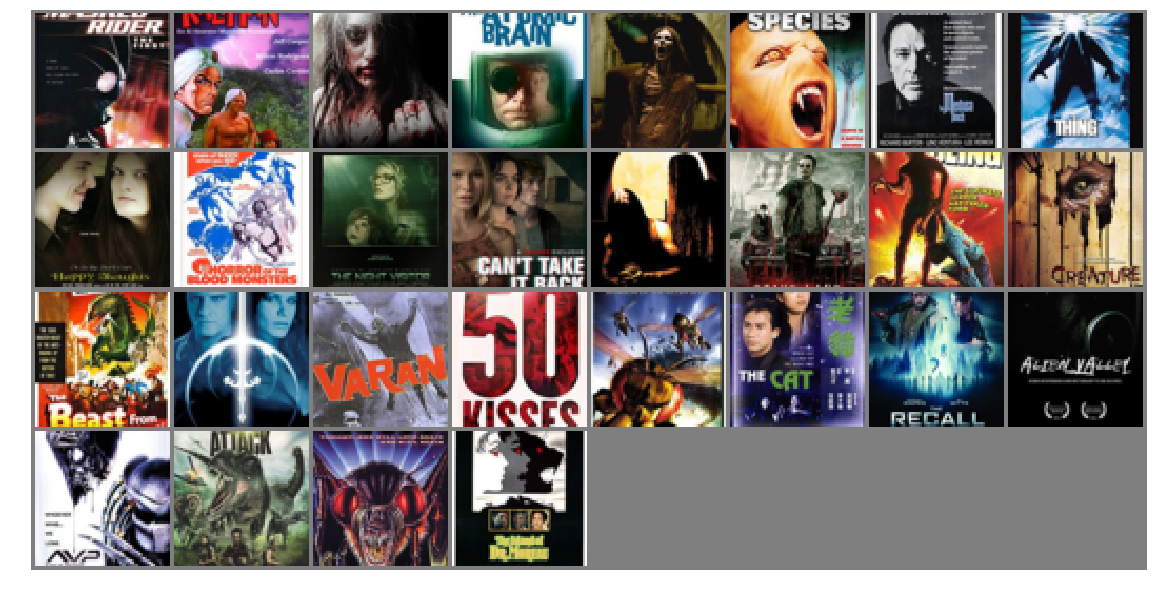

In [64]:
show(make_grid(real_cpu.cpu())) #show some real data

In [65]:
fake = netG(fixed_noise)
fake.data.size()

torch.Size([32, 3, 64, 64])

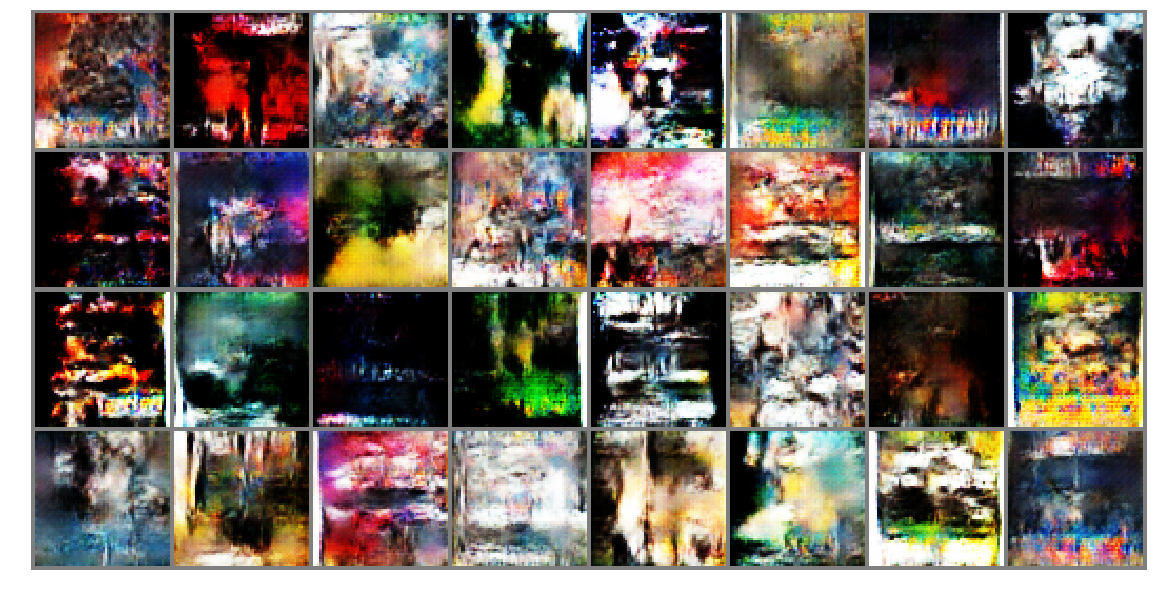

In [66]:
show(make_grid(fake.data.cpu())) # show some fake data. It should look bad for an untrained model

The below loop might take a while

In [67]:
use_cuda=True
for epoch in range(niter):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_cpu, _ = data
        batch_size = real_cpu.size(0)
        if use_cuda:
            real_cpu = real_cpu.cuda()
        input.resize_as_(real_cpu).copy_(real_cpu)
        label.resize_(batch_size).fill_(real_label)
        inputv = Variable(input)
        labelv = Variable(label)

        output = netD(inputv)
        errD_real = criterion(output, labelv)
        errD_real.backward()
        D_x = output.data.mean()

        # train with fake
        noise.resize_(batch_size, nz, 1, 1).normal_(0, 1)
        noisev = Variable(noise)
        fake = netG(noisev)
        labelv = Variable(label.fill_(fake_label))
        output = netD(fake.detach())
        errD_fake = criterion(output, labelv)
        errD_fake.backward()
        D_G_z1 = output.data.mean()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        labelv = Variable(label.fill_(real_label))  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labelv)
        errG.backward()
        D_G_z2 = output.data.mean()
        optimizerG.step()

        if i % 50 == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch, niter, i, len(dataloader),
                     errD.data[0], errG.data[0], D_x, D_G_z1, D_G_z2))
        
        

        if i % 100 == 0:
            vutils.save_image(real_cpu,'%s/real_samples.png' % outf,normalize=True)
            fake = netG(fixed_noise)
            #show(make_grid(fake.data.cpu()))
            vutils.save_image(fake.data,
                    '%s/fake_samples_epoch_%03d.png' % (outf, epoch),
                    normalize=True)


[0/1000][0/54] Loss_D: 1.1165 Loss_G: 1.5903 D(x): 0.5567 D(G(z)): 0.0187 / 0.4804
[0/1000][50/54] Loss_D: 0.1499 Loss_G: 5.3196 D(x): 0.9292 D(G(z)): 0.0589 / 0.0092
[1/1000][0/54] Loss_D: 0.1701 Loss_G: 4.7755 D(x): 0.9436 D(G(z)): 0.0907 / 0.0227
[1/1000][50/54] Loss_D: 0.2586 Loss_G: 6.9976 D(x): 0.9781 D(G(z)): 0.1709 / 0.0019
[2/1000][0/54] Loss_D: 0.1004 Loss_G: 5.7746 D(x): 0.9725 D(G(z)): 0.0601 / 0.0059
[2/1000][50/54] Loss_D: 0.1806 Loss_G: 4.5587 D(x): 0.8997 D(G(z)): 0.0603 / 0.0273
[3/1000][0/54] Loss_D: 0.0473 Loss_G: 5.3932 D(x): 0.9746 D(G(z)): 0.0193 / 0.0104
[3/1000][50/54] Loss_D: 0.1838 Loss_G: 4.6706 D(x): 0.9295 D(G(z)): 0.0907 / 0.0163
[4/1000][0/54] Loss_D: 0.0581 Loss_G: 5.1041 D(x): 0.9600 D(G(z)): 0.0152 / 0.0122
[4/1000][50/54] Loss_D: 0.1140 Loss_G: 5.3022 D(x): 0.9182 D(G(z)): 0.0108 / 0.0138
[5/1000][0/54] Loss_D: 0.1579 Loss_G: 7.3859 D(x): 0.8755 D(G(z)): 0.0013 / 0.0022
[5/1000][50/54] Loss_D: 0.3112 Loss_G: 3.5335 D(x): 0.7836 D(G(z)): 0.0097 / 0.125

[24/1000][0/54] Loss_D: 0.0254 Loss_G: 6.1201 D(x): 0.9935 D(G(z)): 0.0184 / 0.0059
[24/1000][50/54] Loss_D: 0.0813 Loss_G: 4.8879 D(x): 0.9478 D(G(z)): 0.0216 / 0.0153
[25/1000][0/54] Loss_D: 0.0551 Loss_G: 5.8305 D(x): 0.9918 D(G(z)): 0.0437 / 0.0049
[25/1000][50/54] Loss_D: 0.0452 Loss_G: 4.3631 D(x): 0.9857 D(G(z)): 0.0297 / 0.0193
[26/1000][0/54] Loss_D: 0.0370 Loss_G: 5.7046 D(x): 0.9902 D(G(z)): 0.0255 / 0.0091
[26/1000][50/54] Loss_D: 0.1154 Loss_G: 6.5407 D(x): 0.9945 D(G(z)): 0.0905 / 0.0050
[27/1000][0/54] Loss_D: 0.0855 Loss_G: 5.6624 D(x): 0.9817 D(G(z)): 0.0555 / 0.0068
[27/1000][50/54] Loss_D: 0.0523 Loss_G: 5.8358 D(x): 0.9818 D(G(z)): 0.0313 / 0.0044
[28/1000][0/54] Loss_D: 0.0267 Loss_G: 5.2914 D(x): 0.9925 D(G(z)): 0.0188 / 0.0079
[28/1000][50/54] Loss_D: 0.0504 Loss_G: 5.5898 D(x): 0.9814 D(G(z)): 0.0297 / 0.0102
[29/1000][0/54] Loss_D: 0.0670 Loss_G: 5.0643 D(x): 0.9738 D(G(z)): 0.0378 / 0.0129
[29/1000][50/54] Loss_D: 0.0448 Loss_G: 5.9527 D(x): 0.9803 D(G(z)): 0.

[48/1000][0/54] Loss_D: 0.0531 Loss_G: 5.5853 D(x): 0.9793 D(G(z)): 0.0294 / 0.0075
[48/1000][50/54] Loss_D: 0.0420 Loss_G: 5.4359 D(x): 0.9740 D(G(z)): 0.0149 / 0.0083
[49/1000][0/54] Loss_D: 0.0367 Loss_G: 6.0982 D(x): 0.9821 D(G(z)): 0.0177 / 0.0049
[49/1000][50/54] Loss_D: 0.0680 Loss_G: 5.1633 D(x): 0.9583 D(G(z)): 0.0200 / 0.0115
[50/1000][0/54] Loss_D: 0.0545 Loss_G: 5.6174 D(x): 0.9692 D(G(z)): 0.0207 / 0.0081
[50/1000][50/54] Loss_D: 0.0325 Loss_G: 6.1225 D(x): 0.9892 D(G(z)): 0.0208 / 0.0067
[51/1000][0/54] Loss_D: 0.0772 Loss_G: 6.0650 D(x): 0.9835 D(G(z)): 0.0540 / 0.0042
[51/1000][50/54] Loss_D: 0.0354 Loss_G: 5.4684 D(x): 0.9839 D(G(z)): 0.0184 / 0.0077
[52/1000][0/54] Loss_D: 0.0384 Loss_G: 6.0001 D(x): 0.9895 D(G(z)): 0.0264 / 0.0058
[52/1000][50/54] Loss_D: 0.0891 Loss_G: 4.6140 D(x): 0.9523 D(G(z)): 0.0362 / 0.0166
[53/1000][0/54] Loss_D: 0.0499 Loss_G: 6.7647 D(x): 0.9937 D(G(z)): 0.0383 / 0.0030
[53/1000][50/54] Loss_D: 0.0321 Loss_G: 5.4520 D(x): 0.9844 D(G(z)): 0.

[72/1000][0/54] Loss_D: 0.0146 Loss_G: 6.3787 D(x): 0.9918 D(G(z)): 0.0062 / 0.0035
[72/1000][50/54] Loss_D: 0.1050 Loss_G: 6.2290 D(x): 0.9242 D(G(z)): 0.0189 / 0.0114
[73/1000][0/54] Loss_D: 0.0313 Loss_G: 6.7048 D(x): 0.9901 D(G(z)): 0.0202 / 0.0038
[73/1000][50/54] Loss_D: 0.0204 Loss_G: 5.5815 D(x): 0.9933 D(G(z)): 0.0133 / 0.0072
[74/1000][0/54] Loss_D: 0.0174 Loss_G: 6.4571 D(x): 0.9873 D(G(z)): 0.0045 / 0.0043
[74/1000][50/54] Loss_D: 0.0183 Loss_G: 6.4196 D(x): 0.9905 D(G(z)): 0.0085 / 0.0042
[75/1000][0/54] Loss_D: 0.0346 Loss_G: 6.0359 D(x): 0.9873 D(G(z)): 0.0206 / 0.0056
[75/1000][50/54] Loss_D: 0.0424 Loss_G: 5.6273 D(x): 0.9831 D(G(z)): 0.0242 / 0.0060
[76/1000][0/54] Loss_D: 0.0141 Loss_G: 6.2741 D(x): 0.9952 D(G(z)): 0.0093 / 0.0048
[76/1000][50/54] Loss_D: 0.0280 Loss_G: 5.8791 D(x): 0.9886 D(G(z)): 0.0159 / 0.0060
[77/1000][0/54] Loss_D: 0.0297 Loss_G: 7.0516 D(x): 0.9769 D(G(z)): 0.0031 / 0.0025
[77/1000][50/54] Loss_D: 0.0245 Loss_G: 5.5038 D(x): 0.9871 D(G(z)): 0.

[96/1000][0/54] Loss_D: 0.0150 Loss_G: 6.1697 D(x): 0.9954 D(G(z)): 0.0103 / 0.0046
[96/1000][50/54] Loss_D: 0.0244 Loss_G: 5.9499 D(x): 0.9971 D(G(z)): 0.0205 / 0.0049
[97/1000][0/54] Loss_D: 0.0242 Loss_G: 5.9166 D(x): 0.9843 D(G(z)): 0.0080 / 0.0060
[97/1000][50/54] Loss_D: 0.0608 Loss_G: 7.3218 D(x): 0.9973 D(G(z)): 0.0532 / 0.0014
[98/1000][0/54] Loss_D: 0.0135 Loss_G: 5.7142 D(x): 0.9966 D(G(z)): 0.0100 / 0.0074
[98/1000][50/54] Loss_D: 0.0328 Loss_G: 5.8715 D(x): 0.9832 D(G(z)): 0.0149 / 0.0056
[99/1000][0/54] Loss_D: 0.0231 Loss_G: 5.9262 D(x): 0.9931 D(G(z)): 0.0159 / 0.0050
[99/1000][50/54] Loss_D: 0.0518 Loss_G: 5.9516 D(x): 0.9781 D(G(z)): 0.0261 / 0.0035
[100/1000][0/54] Loss_D: 0.0154 Loss_G: 6.9450 D(x): 0.9877 D(G(z)): 0.0029 / 0.0027
[100/1000][50/54] Loss_D: 0.0290 Loss_G: 5.9515 D(x): 0.9774 D(G(z)): 0.0057 / 0.0075
[101/1000][0/54] Loss_D: 0.0137 Loss_G: 6.3850 D(x): 0.9948 D(G(z)): 0.0083 / 0.0036
[101/1000][50/54] Loss_D: 0.0184 Loss_G: 5.0651 D(x): 0.9970 D(G(z))

[119/1000][50/54] Loss_D: 0.3136 Loss_G: 8.2119 D(x): 0.8761 D(G(z)): 0.0962 / 0.0045
[120/1000][0/54] Loss_D: 0.2261 Loss_G: 5.8205 D(x): 0.8866 D(G(z)): 0.0676 / 0.0077
[120/1000][50/54] Loss_D: 0.3889 Loss_G: 8.5858 D(x): 0.9758 D(G(z)): 0.2658 / 0.0015
[121/1000][0/54] Loss_D: 0.4026 Loss_G: 7.2892 D(x): 0.9828 D(G(z)): 0.2472 / 0.0017
[121/1000][50/54] Loss_D: 0.2256 Loss_G: 5.3814 D(x): 0.9482 D(G(z)): 0.1322 / 0.0099
[122/1000][0/54] Loss_D: 0.1424 Loss_G: 5.8648 D(x): 0.9456 D(G(z)): 0.0527 / 0.0075
[122/1000][50/54] Loss_D: 0.1927 Loss_G: 4.0123 D(x): 0.8781 D(G(z)): 0.0293 / 0.0549
[123/1000][0/54] Loss_D: 0.1130 Loss_G: 4.7549 D(x): 0.9188 D(G(z)): 0.0164 / 0.0148
[123/1000][50/54] Loss_D: 0.0776 Loss_G: 5.0383 D(x): 0.9473 D(G(z)): 0.0210 / 0.0134
[124/1000][0/54] Loss_D: 0.0744 Loss_G: 5.2502 D(x): 0.9762 D(G(z)): 0.0445 / 0.0145
[124/1000][50/54] Loss_D: 0.0458 Loss_G: 5.6983 D(x): 0.9885 D(G(z)): 0.0323 / 0.0101
[125/1000][0/54] Loss_D: 0.0805 Loss_G: 4.9215 D(x): 0.9592

[143/1000][0/54] Loss_D: 0.4367 Loss_G: 8.3823 D(x): 0.8740 D(G(z)): 0.0990 / 0.0021
[143/1000][50/54] Loss_D: 0.3018 Loss_G: 7.4002 D(x): 0.9566 D(G(z)): 0.1577 / 0.0019
[144/1000][0/54] Loss_D: 0.1400 Loss_G: 6.9737 D(x): 0.9705 D(G(z)): 0.0692 / 0.0040
[144/1000][50/54] Loss_D: 0.0826 Loss_G: 5.7530 D(x): 0.9785 D(G(z)): 0.0524 / 0.0067
[145/1000][0/54] Loss_D: 0.0415 Loss_G: 5.3141 D(x): 0.9908 D(G(z)): 0.0302 / 0.0111
[145/1000][50/54] Loss_D: 0.0744 Loss_G: 5.6646 D(x): 0.9677 D(G(z)): 0.0317 / 0.0071
[146/1000][0/54] Loss_D: 0.0436 Loss_G: 5.8758 D(x): 0.9818 D(G(z)): 0.0237 / 0.0088
[146/1000][50/54] Loss_D: 0.0755 Loss_G: 5.6168 D(x): 0.9446 D(G(z)): 0.0077 / 0.0071
[147/1000][0/54] Loss_D: 0.0487 Loss_G: 6.2598 D(x): 0.9922 D(G(z)): 0.0366 / 0.0046
[147/1000][50/54] Loss_D: 0.0454 Loss_G: 5.3138 D(x): 0.9700 D(G(z)): 0.0135 / 0.0096
[148/1000][0/54] Loss_D: 0.0166 Loss_G: 6.6797 D(x): 0.9888 D(G(z)): 0.0052 / 0.0027
[148/1000][50/54] Loss_D: 0.0342 Loss_G: 6.0860 D(x): 0.9963

[166/1000][50/54] Loss_D: 0.0097 Loss_G: 7.0989 D(x): 0.9982 D(G(z)): 0.0078 / 0.0015
[167/1000][0/54] Loss_D: 0.0090 Loss_G: 7.7892 D(x): 0.9972 D(G(z)): 0.0062 / 0.0010
[167/1000][50/54] Loss_D: 0.0113 Loss_G: 8.0422 D(x): 0.9909 D(G(z)): 0.0016 / 0.0010
[168/1000][0/54] Loss_D: 0.0061 Loss_G: 7.7490 D(x): 0.9977 D(G(z)): 0.0037 / 0.0012
[168/1000][50/54] Loss_D: 0.0243 Loss_G: 8.2144 D(x): 0.9981 D(G(z)): 0.0216 / 0.0010
[169/1000][0/54] Loss_D: 0.0088 Loss_G: 7.1000 D(x): 0.9948 D(G(z)): 0.0035 / 0.0021
[169/1000][50/54] Loss_D: 0.0322 Loss_G: 6.0871 D(x): 0.9784 D(G(z)): 0.0062 / 0.0047
[170/1000][0/54] Loss_D: 0.0031 Loss_G: 8.4346 D(x): 0.9985 D(G(z)): 0.0015 / 0.0010
[170/1000][50/54] Loss_D: 1.4828 Loss_G: 17.3519 D(x): 0.9978 D(G(z)): 0.3752 / 0.0000
[171/1000][0/54] Loss_D: 0.2231 Loss_G: 12.0847 D(x): 0.9616 D(G(z)): 0.1035 / 0.0001
[171/1000][50/54] Loss_D: 0.3126 Loss_G: 9.0938 D(x): 0.9334 D(G(z)): 0.1312 / 0.0009
[172/1000][0/54] Loss_D: 0.0568 Loss_G: 6.8308 D(x): 0.99

[190/1000][0/54] Loss_D: 0.0048 Loss_G: 6.8286 D(x): 0.9979 D(G(z)): 0.0027 / 0.0029
[190/1000][50/54] Loss_D: 0.0253 Loss_G: 6.2710 D(x): 0.9839 D(G(z)): 0.0086 / 0.0049
[191/1000][0/54] Loss_D: 0.0168 Loss_G: 7.3504 D(x): 0.9888 D(G(z)): 0.0053 / 0.0026
[191/1000][50/54] Loss_D: 0.0104 Loss_G: 9.5473 D(x): 0.9964 D(G(z)): 0.0063 / 0.0014
[192/1000][0/54] Loss_D: 0.0042 Loss_G: 7.4214 D(x): 0.9992 D(G(z)): 0.0034 / 0.0018
[192/1000][50/54] Loss_D: 0.0041 Loss_G: 8.2083 D(x): 0.9968 D(G(z)): 0.0008 / 0.0010
[193/1000][0/54] Loss_D: 0.0122 Loss_G: 7.7226 D(x): 0.9936 D(G(z)): 0.0055 / 0.0011
[193/1000][50/54] Loss_D: 0.0055 Loss_G: 8.0330 D(x): 0.9962 D(G(z)): 0.0016 / 0.0010
[194/1000][0/54] Loss_D: 0.0066 Loss_G: 11.0732 D(x): 0.9950 D(G(z)): 0.0016 / 0.0008
[194/1000][50/54] Loss_D: 0.0024 Loss_G: 7.6405 D(x): 0.9995 D(G(z)): 0.0018 / 0.0012
[195/1000][0/54] Loss_D: 0.0120 Loss_G: 9.6217 D(x): 0.9892 D(G(z)): 0.0009 / 0.0005
[195/1000][50/54] Loss_D: 0.0133 Loss_G: 6.8107 D(x): 0.992

[213/1000][50/54] Loss_D: 0.0088 Loss_G: 8.5156 D(x): 0.9938 D(G(z)): 0.0026 / 0.0010
[214/1000][0/54] Loss_D: 0.0052 Loss_G: 10.1663 D(x): 0.9973 D(G(z)): 0.0025 / 0.0007
[214/1000][50/54] Loss_D: 0.0092 Loss_G: 9.4422 D(x): 0.9922 D(G(z)): 0.0012 / 0.0002
[215/1000][0/54] Loss_D: 0.0074 Loss_G: 7.7587 D(x): 0.9963 D(G(z)): 0.0036 / 0.0013
[215/1000][50/54] Loss_D: 0.0043 Loss_G: 10.7653 D(x): 0.9958 D(G(z)): 0.0001 / 0.0001
[216/1000][0/54] Loss_D: 0.0112 Loss_G: 7.6098 D(x): 0.9973 D(G(z)): 0.0083 / 0.0012
[216/1000][50/54] Loss_D: 0.0160 Loss_G: 8.5288 D(x): 0.9989 D(G(z)): 0.0145 / 0.0007
[217/1000][0/54] Loss_D: 0.0316 Loss_G: 11.2927 D(x): 0.9966 D(G(z)): 0.0266 / 0.0004
[217/1000][50/54] Loss_D: 0.0036 Loss_G: 9.1490 D(x): 0.9973 D(G(z)): 0.0009 / 0.0007
[218/1000][0/54] Loss_D: 0.0394 Loss_G: 9.1640 D(x): 0.9989 D(G(z)): 0.0344 / 0.0003
[218/1000][50/54] Loss_D: 0.0238 Loss_G: 6.8834 D(x): 0.9870 D(G(z)): 0.0101 / 0.0019
[219/1000][0/54] Loss_D: 0.0192 Loss_G: 7.4623 D(x): 0.9

[237/1000][0/54] Loss_D: 0.0089 Loss_G: 7.4214 D(x): 0.9942 D(G(z)): 0.0031 / 0.0020
[237/1000][50/54] Loss_D: 0.0377 Loss_G: 6.3720 D(x): 0.9916 D(G(z)): 0.0278 / 0.0047
[238/1000][0/54] Loss_D: 0.0445 Loss_G: 8.3652 D(x): 0.9611 D(G(z)): 0.0008 / 0.0045
[238/1000][50/54] Loss_D: 0.1122 Loss_G: 3.7484 D(x): 0.9147 D(G(z)): 0.0112 / 0.0617
[239/1000][0/54] Loss_D: 0.0057 Loss_G: 18.6848 D(x): 0.9995 D(G(z)): 0.0050 / 0.0001
[239/1000][50/54] Loss_D: 0.0348 Loss_G: 9.7060 D(x): 0.9704 D(G(z)): 0.0021 / 0.0008
[240/1000][0/54] Loss_D: 0.0144 Loss_G: 6.5209 D(x): 0.9996 D(G(z)): 0.0137 / 0.0041
[240/1000][50/54] Loss_D: 0.0047 Loss_G: 8.3706 D(x): 0.9968 D(G(z)): 0.0015 / 0.0008
[241/1000][0/54] Loss_D: 0.0273 Loss_G: 6.8283 D(x): 0.9859 D(G(z)): 0.0122 / 0.0034
[241/1000][50/54] Loss_D: 0.0238 Loss_G: 6.8499 D(x): 0.9863 D(G(z)): 0.0093 / 0.0021
[242/1000][0/54] Loss_D: 0.0126 Loss_G: 7.1289 D(x): 0.9921 D(G(z)): 0.0045 / 0.0022
[242/1000][50/54] Loss_D: 0.0212 Loss_G: 7.1105 D(x): 0.994

[260/1000][50/54] Loss_D: 0.0611 Loss_G: 10.4321 D(x): 0.9751 D(G(z)): 0.0208 / 0.0010
[261/1000][0/54] Loss_D: 0.0106 Loss_G: 6.9084 D(x): 0.9976 D(G(z)): 0.0081 / 0.0028
[261/1000][50/54] Loss_D: 0.0242 Loss_G: 6.7751 D(x): 0.9952 D(G(z)): 0.0180 / 0.0040
[262/1000][0/54] Loss_D: 0.0438 Loss_G: 7.8462 D(x): 0.9986 D(G(z)): 0.0401 / 0.0013
[262/1000][50/54] Loss_D: 0.0790 Loss_G: 5.0070 D(x): 0.9483 D(G(z)): 0.0082 / 0.0113
[263/1000][0/54] Loss_D: 0.0229 Loss_G: 7.8308 D(x): 0.9997 D(G(z)): 0.0216 / 0.0014
[263/1000][50/54] Loss_D: 0.0074 Loss_G: 6.4774 D(x): 0.9981 D(G(z)): 0.0055 / 0.0026
[264/1000][0/54] Loss_D: 0.0087 Loss_G: 6.8808 D(x): 0.9985 D(G(z)): 0.0071 / 0.0023
[264/1000][50/54] Loss_D: 0.0166 Loss_G: 10.5542 D(x): 0.9973 D(G(z)): 0.0133 / 0.0032
[265/1000][0/54] Loss_D: 0.0052 Loss_G: 11.0668 D(x): 0.9991 D(G(z)): 0.0043 / 0.0019
[265/1000][50/54] Loss_D: 0.0294 Loss_G: 7.0941 D(x): 0.9825 D(G(z)): 0.0109 / 0.0033
[266/1000][0/54] Loss_D: 0.1366 Loss_G: 6.8743 D(x): 0.9

[284/1000][0/54] Loss_D: 0.0541 Loss_G: 11.0172 D(x): 0.9899 D(G(z)): 0.0399 / 0.0009
[284/1000][50/54] Loss_D: 0.0070 Loss_G: 8.2354 D(x): 0.9951 D(G(z)): 0.0021 / 0.0008
[285/1000][0/54] Loss_D: 0.0079 Loss_G: 8.3447 D(x): 0.9949 D(G(z)): 0.0026 / 0.0009
[285/1000][50/54] Loss_D: 0.0142 Loss_G: 12.6576 D(x): 0.9882 D(G(z)): 0.0007 / 0.0004
[286/1000][0/54] Loss_D: 0.0026 Loss_G: 13.4879 D(x): 0.9979 D(G(z)): 0.0005 / 0.0003
[286/1000][50/54] Loss_D: 0.0265 Loss_G: 7.9744 D(x): 0.9759 D(G(z)): 0.0007 / 0.0016
[287/1000][0/54] Loss_D: 0.0960 Loss_G: 16.7002 D(x): 0.9992 D(G(z)): 0.0733 / 0.0001
[287/1000][50/54] Loss_D: 0.0208 Loss_G: 8.6136 D(x): 0.9923 D(G(z)): 0.0126 / 0.0012
[288/1000][0/54] Loss_D: 0.0048 Loss_G: 9.0959 D(x): 0.9982 D(G(z)): 0.0030 / 0.0006
[288/1000][50/54] Loss_D: 0.0098 Loss_G: 7.6747 D(x): 0.9948 D(G(z)): 0.0045 / 0.0014
[289/1000][0/54] Loss_D: 0.0081 Loss_G: 13.2134 D(x): 0.9930 D(G(z)): 0.0011 / 0.0006
[289/1000][50/54] Loss_D: 0.0191 Loss_G: 8.6224 D(x): 0

[307/1000][50/54] Loss_D: 0.0437 Loss_G: 8.4834 D(x): 0.9975 D(G(z)): 0.0360 / 0.0017
[308/1000][0/54] Loss_D: 0.0217 Loss_G: 8.9676 D(x): 0.9881 D(G(z)): 0.0070 / 0.0007
[308/1000][50/54] Loss_D: 0.0074 Loss_G: 10.2167 D(x): 0.9947 D(G(z)): 0.0019 / 0.0004
[309/1000][0/54] Loss_D: 0.0632 Loss_G: 10.2434 D(x): 0.9992 D(G(z)): 0.0501 / 0.0002
[309/1000][50/54] Loss_D: 0.0300 Loss_G: 7.3722 D(x): 0.9783 D(G(z)): 0.0067 / 0.0034
[310/1000][0/54] Loss_D: 0.0190 Loss_G: 13.8995 D(x): 0.9822 D(G(z)): 0.0001 / 0.0000
[310/1000][50/54] Loss_D: 0.0150 Loss_G: 10.8782 D(x): 0.9977 D(G(z)): 0.0123 / 0.0001
[311/1000][0/54] Loss_D: 0.0458 Loss_G: 9.2058 D(x): 0.9908 D(G(z)): 0.0294 / 0.0005
[311/1000][50/54] Loss_D: 0.0046 Loss_G: 13.1587 D(x): 0.9974 D(G(z)): 0.0020 / 0.0032
[312/1000][0/54] Loss_D: 0.0144 Loss_G: 14.7318 D(x): 0.9876 D(G(z)): 0.0015 / 0.0001
[312/1000][50/54] Loss_D: 0.0126 Loss_G: 8.2832 D(x): 0.9934 D(G(z)): 0.0057 / 0.0012
[313/1000][0/54] Loss_D: 0.0072 Loss_G: 8.0193 D(x): 

[331/1000][0/54] Loss_D: 0.0078 Loss_G: 10.8457 D(x): 0.9946 D(G(z)): 0.0023 / 0.0003
[331/1000][50/54] Loss_D: 0.0339 Loss_G: 14.1738 D(x): 0.9877 D(G(z)): 0.0177 / 0.0000
[332/1000][0/54] Loss_D: 0.0050 Loss_G: 12.0150 D(x): 0.9973 D(G(z)): 0.0022 / 0.0003
[332/1000][50/54] Loss_D: 0.0054 Loss_G: 10.8727 D(x): 0.9982 D(G(z)): 0.0035 / 0.0018
[333/1000][0/54] Loss_D: 0.0059 Loss_G: 10.0740 D(x): 0.9970 D(G(z)): 0.0029 / 0.0011
[333/1000][50/54] Loss_D: 0.0444 Loss_G: 10.1472 D(x): 0.9972 D(G(z)): 0.0368 / 0.0002
[334/1000][0/54] Loss_D: 0.0399 Loss_G: 7.6540 D(x): 0.9784 D(G(z)): 0.0097 / 0.0026
[334/1000][50/54] Loss_D: 0.0081 Loss_G: 7.7365 D(x): 0.9981 D(G(z)): 0.0061 / 0.0017
[335/1000][0/54] Loss_D: 0.0222 Loss_G: 7.0346 D(x): 0.9922 D(G(z)): 0.0138 / 0.0031
[335/1000][50/54] Loss_D: 0.0132 Loss_G: 7.9026 D(x): 0.9982 D(G(z)): 0.0111 / 0.0016
[336/1000][0/54] Loss_D: 0.0111 Loss_G: 7.7033 D(x): 0.9988 D(G(z)): 0.0096 / 0.0024
[336/1000][50/54] Loss_D: 0.0442 Loss_G: 10.1237 D(x):

[354/1000][50/54] Loss_D: 0.0067 Loss_G: 7.6738 D(x): 0.9995 D(G(z)): 0.0060 / 0.0022
[355/1000][0/54] Loss_D: 0.0038 Loss_G: 8.5324 D(x): 0.9985 D(G(z)): 0.0022 / 0.0025
[355/1000][50/54] Loss_D: 0.0053 Loss_G: 7.5409 D(x): 0.9974 D(G(z)): 0.0026 / 0.0014
[356/1000][0/54] Loss_D: 0.0061 Loss_G: 7.5446 D(x): 0.9993 D(G(z)): 0.0053 / 0.0013
[356/1000][50/54] Loss_D: 0.0094 Loss_G: 17.5824 D(x): 0.9995 D(G(z)): 0.0081 / 0.0029
[357/1000][0/54] Loss_D: 0.0064 Loss_G: 13.9540 D(x): 0.9995 D(G(z)): 0.0058 / 0.0010
[357/1000][50/54] Loss_D: 0.0086 Loss_G: 10.4888 D(x): 0.9969 D(G(z)): 0.0053 / 0.0004
[358/1000][0/54] Loss_D: 0.0043 Loss_G: 9.9291 D(x): 0.9976 D(G(z)): 0.0018 / 0.0004
[358/1000][50/54] Loss_D: 0.0111 Loss_G: 7.8907 D(x): 0.9941 D(G(z)): 0.0049 / 0.0012
[359/1000][0/54] Loss_D: 0.0273 Loss_G: 8.1669 D(x): 0.9766 D(G(z)): 0.0025 / 0.0020
[359/1000][50/54] Loss_D: 0.0193 Loss_G: 7.4528 D(x): 0.9887 D(G(z)): 0.0073 / 0.0013
[360/1000][0/54] Loss_D: 0.0298 Loss_G: 8.1944 D(x): 0.9

[378/1000][0/54] Loss_D: 0.0257 Loss_G: 11.5687 D(x): 0.9994 D(G(z)): 0.0198 / 0.0003
[378/1000][50/54] Loss_D: 0.0626 Loss_G: 11.6107 D(x): 0.9511 D(G(z)): 0.0004 / 0.0002
[379/1000][0/54] Loss_D: 0.0156 Loss_G: 9.8433 D(x): 0.9974 D(G(z)): 0.0128 / 0.0007
[379/1000][50/54] Loss_D: 0.0781 Loss_G: 15.4537 D(x): 0.9888 D(G(z)): 0.0394 / 0.0005
[380/1000][0/54] Loss_D: 0.0829 Loss_G: 15.5867 D(x): 0.9788 D(G(z)): 0.0386 / 0.0001
[380/1000][50/54] Loss_D: 0.0432 Loss_G: 9.8084 D(x): 0.9628 D(G(z)): 0.0016 / 0.0024
[381/1000][0/54] Loss_D: 0.0112 Loss_G: 18.4215 D(x): 0.9892 D(G(z)): 0.0000 / 0.0000
[381/1000][50/54] Loss_D: 0.0124 Loss_G: 8.9217 D(x): 0.9940 D(G(z)): 0.0060 / 0.0009
[382/1000][0/54] Loss_D: 0.0062 Loss_G: 7.9624 D(x): 0.9994 D(G(z)): 0.0055 / 0.0010
[382/1000][50/54] Loss_D: 0.0326 Loss_G: 16.2227 D(x): 0.9711 D(G(z)): 0.0001 / 0.0000
[383/1000][0/54] Loss_D: 0.0126 Loss_G: 10.2012 D(x): 0.9911 D(G(z)): 0.0035 / 0.0023
[383/1000][50/54] Loss_D: 0.0043 Loss_G: 8.0165 D(x):

[401/1000][50/54] Loss_D: 0.0566 Loss_G: 11.7883 D(x): 0.9550 D(G(z)): 0.0007 / 0.0022
[402/1000][0/54] Loss_D: 0.0127 Loss_G: 8.2870 D(x): 0.9998 D(G(z)): 0.0123 / 0.0024
[402/1000][50/54] Loss_D: 0.0320 Loss_G: 13.4796 D(x): 0.9999 D(G(z)): 0.0280 / 0.0004
[403/1000][0/54] Loss_D: 0.0086 Loss_G: 9.3236 D(x): 0.9989 D(G(z)): 0.0073 / 0.0012
[403/1000][50/54] Loss_D: 0.0060 Loss_G: 9.0777 D(x): 0.9949 D(G(z)): 0.0009 / 0.0004
[404/1000][0/54] Loss_D: 0.0286 Loss_G: 8.2329 D(x): 0.9980 D(G(z)): 0.0254 / 0.0007
[404/1000][50/54] Loss_D: 0.0087 Loss_G: 7.3176 D(x): 0.9974 D(G(z)): 0.0060 / 0.0018
[405/1000][0/54] Loss_D: 0.0066 Loss_G: 9.9248 D(x): 0.9946 D(G(z)): 0.0011 / 0.0006
[405/1000][50/54] Loss_D: 0.1674 Loss_G: 11.6968 D(x): 0.8838 D(G(z)): 0.0001 / 0.0001
[406/1000][0/54] Loss_D: 0.0231 Loss_G: 8.0910 D(x): 0.9999 D(G(z)): 0.0213 / 0.0012
[406/1000][50/54] Loss_D: 0.0018 Loss_G: 12.0790 D(x): 0.9986 D(G(z)): 0.0005 / 0.0004
[407/1000][0/54] Loss_D: 0.0041 Loss_G: 16.2551 D(x): 0

[425/1000][0/54] Loss_D: 0.0077 Loss_G: 9.5073 D(x): 0.9998 D(G(z)): 0.0074 / 0.0003
[425/1000][50/54] Loss_D: 0.0112 Loss_G: 10.4263 D(x): 0.9974 D(G(z)): 0.0084 / 0.0009
[426/1000][0/54] Loss_D: 0.0062 Loss_G: 8.6220 D(x): 0.9980 D(G(z)): 0.0041 / 0.0011
[426/1000][50/54] Loss_D: 0.0035 Loss_G: 8.9036 D(x): 0.9997 D(G(z)): 0.0031 / 0.0010
[427/1000][0/54] Loss_D: 0.0055 Loss_G: 10.2720 D(x): 0.9966 D(G(z)): 0.0021 / 0.0002
[427/1000][50/54] Loss_D: 0.0216 Loss_G: 5.5188 D(x): 0.9845 D(G(z)): 0.0053 / 0.0108
[428/1000][0/54] Loss_D: 0.8697 Loss_G: 23.6089 D(x): 1.0000 D(G(z)): 0.2426 / 0.0000
[428/1000][50/54] Loss_D: 0.0402 Loss_G: 16.8878 D(x): 0.9768 D(G(z)): 0.0003 / 0.0010
[429/1000][0/54] Loss_D: 0.0893 Loss_G: 15.6130 D(x): 0.9658 D(G(z)): 0.0061 / 0.0028
[429/1000][50/54] Loss_D: 0.0112 Loss_G: 10.1551 D(x): 0.9911 D(G(z)): 0.0016 / 0.0032
[430/1000][0/54] Loss_D: 0.0411 Loss_G: 17.1549 D(x): 0.9768 D(G(z)): 0.0062 / 0.1063
[430/1000][50/54] Loss_D: 0.0574 Loss_G: 10.6654 D(x)

[448/1000][50/54] Loss_D: 0.0292 Loss_G: 7.2302 D(x): 0.9810 D(G(z)): 0.0089 / 0.0048
[449/1000][0/54] Loss_D: 0.0177 Loss_G: 8.1161 D(x): 0.9888 D(G(z)): 0.0059 / 0.0020
[449/1000][50/54] Loss_D: 0.0096 Loss_G: 7.3671 D(x): 0.9938 D(G(z)): 0.0028 / 0.0016
[450/1000][0/54] Loss_D: 0.0192 Loss_G: 7.3158 D(x): 0.9898 D(G(z)): 0.0081 / 0.0018
[450/1000][50/54] Loss_D: 0.0048 Loss_G: 7.4786 D(x): 0.9975 D(G(z)): 0.0023 / 0.0013
[451/1000][0/54] Loss_D: 0.0310 Loss_G: 8.2770 D(x): 0.9864 D(G(z)): 0.0165 / 0.0014
[451/1000][50/54] Loss_D: 0.0096 Loss_G: 11.5246 D(x): 0.9989 D(G(z)): 0.0083 / 0.0009
[452/1000][0/54] Loss_D: 0.0113 Loss_G: 11.2852 D(x): 0.9991 D(G(z)): 0.0101 / 0.0009
[452/1000][50/54] Loss_D: 0.0092 Loss_G: 8.2379 D(x): 0.9939 D(G(z)): 0.0029 / 0.0011
[453/1000][0/54] Loss_D: 0.1342 Loss_G: 19.2292 D(x): 0.9982 D(G(z)): 0.1162 / 0.0000
[453/1000][50/54] Loss_D: 0.0045 Loss_G: 7.7829 D(x): 0.9985 D(G(z)): 0.0030 / 0.0014
[454/1000][0/54] Loss_D: 0.0079 Loss_G: 8.7927 D(x): 0.9

[472/1000][0/54] Loss_D: 0.0863 Loss_G: 13.9028 D(x): 0.9341 D(G(z)): 0.0001 / 0.0031
[472/1000][50/54] Loss_D: 0.0263 Loss_G: 12.0584 D(x): 0.9768 D(G(z)): 0.0009 / 0.0011
[473/1000][0/54] Loss_D: 0.0584 Loss_G: 13.3419 D(x): 0.9998 D(G(z)): 0.0493 / 0.0007
[473/1000][50/54] Loss_D: 0.0118 Loss_G: 8.5514 D(x): 0.9997 D(G(z)): 0.0111 / 0.0006
[474/1000][0/54] Loss_D: 0.0042 Loss_G: 9.0950 D(x): 0.9991 D(G(z)): 0.0033 / 0.0008
[474/1000][50/54] Loss_D: 0.0049 Loss_G: 15.6149 D(x): 0.9984 D(G(z)): 0.0032 / 0.0006
[475/1000][0/54] Loss_D: 0.0354 Loss_G: 14.9423 D(x): 0.9988 D(G(z)): 0.0319 / 0.0009
[475/1000][50/54] Loss_D: 0.0607 Loss_G: 16.1451 D(x): 0.9996 D(G(z)): 0.0446 / 0.0000
[476/1000][0/54] Loss_D: 0.0121 Loss_G: 12.5176 D(x): 0.9979 D(G(z)): 0.0096 / 0.0005
[476/1000][50/54] Loss_D: 0.4451 Loss_G: 17.1281 D(x): 0.7867 D(G(z)): 0.0000 / 0.0000
[477/1000][0/54] Loss_D: 0.3097 Loss_G: 11.1562 D(x): 0.8312 D(G(z)): 0.0209 / 0.1600
[477/1000][50/54] Loss_D: 0.3900 Loss_G: 20.0530 D(

[495/1000][50/54] Loss_D: 0.0225 Loss_G: 12.6386 D(x): 0.9820 D(G(z)): 0.0019 / 0.0010
[496/1000][0/54] Loss_D: 0.0976 Loss_G: 17.3504 D(x): 0.9998 D(G(z)): 0.0578 / 0.0002
[496/1000][50/54] Loss_D: 0.0309 Loss_G: 8.9603 D(x): 0.9855 D(G(z)): 0.0148 / 0.0019
[497/1000][0/54] Loss_D: 0.0097 Loss_G: 9.6579 D(x): 0.9952 D(G(z)): 0.0048 / 0.0003
[497/1000][50/54] Loss_D: 0.0577 Loss_G: 6.8864 D(x): 0.9619 D(G(z)): 0.0055 / 0.0040
[498/1000][0/54] Loss_D: 0.0467 Loss_G: 8.9834 D(x): 0.9999 D(G(z)): 0.0413 / 0.0018
[498/1000][50/54] Loss_D: 0.0071 Loss_G: 8.6831 D(x): 0.9996 D(G(z)): 0.0067 / 0.0040
[499/1000][0/54] Loss_D: 0.0039 Loss_G: 17.4633 D(x): 0.9962 D(G(z)): 0.0000 / 0.0000
[499/1000][50/54] Loss_D: 0.0347 Loss_G: 11.3182 D(x): 0.9990 D(G(z)): 0.0273 / 0.0004
[500/1000][0/54] Loss_D: 0.0415 Loss_G: 11.3771 D(x): 0.9997 D(G(z)): 0.0389 / 0.0007
[500/1000][50/54] Loss_D: 0.0180 Loss_G: 7.8029 D(x): 0.9887 D(G(z)): 0.0042 / 0.0012
[501/1000][0/54] Loss_D: 0.0381 Loss_G: 8.5932 D(x): 0

[519/1000][0/54] Loss_D: 0.0306 Loss_G: 17.1685 D(x): 0.9723 D(G(z)): 0.0003 / 0.0003
[519/1000][50/54] Loss_D: 0.0205 Loss_G: 9.7101 D(x): 0.9811 D(G(z)): 0.0007 / 0.0011
[520/1000][0/54] Loss_D: 0.0229 Loss_G: 8.4757 D(x): 0.9953 D(G(z)): 0.0173 / 0.0017
[520/1000][50/54] Loss_D: 0.0214 Loss_G: 12.1010 D(x): 0.9813 D(G(z)): 0.0009 / 0.0006
[521/1000][0/54] Loss_D: 0.0233 Loss_G: 13.2257 D(x): 0.9781 D(G(z)): 0.0003 / 0.0002
[521/1000][50/54] Loss_D: 0.0193 Loss_G: 13.1688 D(x): 0.9911 D(G(z)): 0.0097 / 0.0019
[522/1000][0/54] Loss_D: 0.0196 Loss_G: 12.3298 D(x): 0.9983 D(G(z)): 0.0169 / 0.0009
[522/1000][50/54] Loss_D: 0.0170 Loss_G: 14.5127 D(x): 0.9866 D(G(z)): 0.0029 / 0.0006
[523/1000][0/54] Loss_D: 0.0387 Loss_G: 13.9335 D(x): 0.9722 D(G(z)): 0.0028 / 0.0022
[523/1000][50/54] Loss_D: 0.0387 Loss_G: 6.7018 D(x): 0.9809 D(G(z)): 0.0177 / 0.0027
[524/1000][0/54] Loss_D: 0.0311 Loss_G: 8.9252 D(x): 0.9716 D(G(z)): 0.0003 / 0.0003
[524/1000][50/54] Loss_D: 0.0977 Loss_G: 10.1983 D(x)

[542/1000][50/54] Loss_D: 0.0091 Loss_G: 14.8406 D(x): 0.9919 D(G(z)): 0.0005 / 0.0005
[543/1000][0/54] Loss_D: 0.0201 Loss_G: 12.3547 D(x): 0.9921 D(G(z)): 0.0104 / 0.0011
[543/1000][50/54] Loss_D: 0.0042 Loss_G: 17.1581 D(x): 0.9999 D(G(z)): 0.0040 / 0.0005
[544/1000][0/54] Loss_D: 0.0037 Loss_G: 16.6623 D(x): 0.9985 D(G(z)): 0.0022 / 0.0004
[544/1000][50/54] Loss_D: 0.0200 Loss_G: 12.2970 D(x): 0.9889 D(G(z)): 0.0073 / 0.0010
[545/1000][0/54] Loss_D: 0.0130 Loss_G: 11.9602 D(x): 0.9993 D(G(z)): 0.0116 / 0.0004
[545/1000][50/54] Loss_D: 0.0876 Loss_G: 8.7673 D(x): 0.9394 D(G(z)): 0.0010 / 0.0023
[546/1000][0/54] Loss_D: 0.0010 Loss_G: 10.2591 D(x): 0.9995 D(G(z)): 0.0005 / 0.0002
[546/1000][50/54] Loss_D: 0.0109 Loss_G: 9.4849 D(x): 0.9958 D(G(z)): 0.0064 / 0.0015
[547/1000][0/54] Loss_D: 0.1246 Loss_G: 5.4971 D(x): 0.9271 D(G(z)): 0.0034 / 0.0290
[547/1000][50/54] Loss_D: 0.0720 Loss_G: 14.2184 D(x): 0.9506 D(G(z)): 0.0001 / 0.0008
[548/1000][0/54] Loss_D: 0.0076 Loss_G: 10.5039 D(x

[566/1000][0/54] Loss_D: 0.0109 Loss_G: 11.9335 D(x): 0.9998 D(G(z)): 0.0103 / 0.0009
[566/1000][50/54] Loss_D: 0.0146 Loss_G: 10.9935 D(x): 0.9933 D(G(z)): 0.0077 / 0.0025
[567/1000][0/54] Loss_D: 0.3309 Loss_G: 23.4739 D(x): 1.0000 D(G(z)): 0.1709 / 0.0000
[567/1000][50/54] Loss_D: 0.0533 Loss_G: 12.2241 D(x): 0.9999 D(G(z)): 0.0467 / 0.0001
[568/1000][0/54] Loss_D: 0.0967 Loss_G: 14.7962 D(x): 0.9999 D(G(z)): 0.0772 / 0.0000
[568/1000][50/54] Loss_D: 0.0003 Loss_G: 19.4702 D(x): 0.9998 D(G(z)): 0.0001 / 0.0001
[569/1000][0/54] Loss_D: 0.0045 Loss_G: 14.7398 D(x): 0.9999 D(G(z)): 0.0043 / 0.0018
[569/1000][50/54] Loss_D: 0.0025 Loss_G: 16.3375 D(x): 0.9980 D(G(z)): 0.0004 / 0.0004
[570/1000][0/54] Loss_D: 0.0026 Loss_G: 14.6827 D(x): 0.9997 D(G(z)): 0.0023 / 0.0010
[570/1000][50/54] Loss_D: 0.1288 Loss_G: 20.3609 D(x): 0.9944 D(G(z)): 0.0666 / 0.0000
[571/1000][0/54] Loss_D: 0.0871 Loss_G: 17.6126 D(x): 0.9939 D(G(z)): 0.0573 / 0.0003
[571/1000][50/54] Loss_D: 0.0009 Loss_G: 14.9640 

[589/1000][50/54] Loss_D: 0.0015 Loss_G: 10.6686 D(x): 1.0000 D(G(z)): 0.0015 / 0.0003
[590/1000][0/54] Loss_D: 0.0948 Loss_G: 12.4276 D(x): 0.9222 D(G(z)): 0.0000 / 0.0001
[590/1000][50/54] Loss_D: 0.1352 Loss_G: 15.9239 D(x): 0.9999 D(G(z)): 0.0366 / 0.0000
[591/1000][0/54] Loss_D: 0.0656 Loss_G: 10.4821 D(x): 0.9987 D(G(z)): 0.0444 / 0.0003
[591/1000][50/54] Loss_D: 0.0014 Loss_G: 17.7413 D(x): 0.9996 D(G(z)): 0.0010 / 0.0007
[592/1000][0/54] Loss_D: 0.0039 Loss_G: 12.6270 D(x): 0.9975 D(G(z)): 0.0014 / 0.0012
[592/1000][50/54] Loss_D: 0.0619 Loss_G: 14.5336 D(x): 0.9610 D(G(z)): 0.0002 / 0.0004
[593/1000][0/54] Loss_D: 0.0070 Loss_G: 11.7828 D(x): 0.9942 D(G(z)): 0.0011 / 0.0003
[593/1000][50/54] Loss_D: 0.0458 Loss_G: 16.0724 D(x): 0.9616 D(G(z)): 0.0006 / 0.0002
[594/1000][0/54] Loss_D: 0.2810 Loss_G: 22.0705 D(x): 0.9786 D(G(z)): 0.1546 / 0.0000
[594/1000][50/54] Loss_D: 0.0285 Loss_G: 15.6978 D(x): 0.9971 D(G(z)): 0.0213 / 0.0024
[595/1000][0/54] Loss_D: 0.0678 Loss_G: 10.3609 

[613/1000][0/54] Loss_D: 0.0101 Loss_G: 7.3218 D(x): 0.9995 D(G(z)): 0.0095 / 0.0020
[613/1000][50/54] Loss_D: 0.0013 Loss_G: 13.1163 D(x): 1.0000 D(G(z)): 0.0013 / 0.0006
[614/1000][0/54] Loss_D: 0.0002 Loss_G: 17.5558 D(x): 0.9998 D(G(z)): 0.0000 / 0.0000
[614/1000][50/54] Loss_D: 0.0036 Loss_G: 11.2999 D(x): 0.9967 D(G(z)): 0.0002 / 0.0001
[615/1000][0/54] Loss_D: 0.0100 Loss_G: 7.8674 D(x): 0.9997 D(G(z)): 0.0095 / 0.0037
[615/1000][50/54] Loss_D: 0.0358 Loss_G: 15.2607 D(x): 0.9684 D(G(z)): 0.0005 / 0.0004
[616/1000][0/54] Loss_D: 0.0076 Loss_G: 13.0695 D(x): 0.9986 D(G(z)): 0.0060 / 0.0010
[616/1000][50/54] Loss_D: 0.1482 Loss_G: 6.7222 D(x): 0.9473 D(G(z)): 0.0128 / 0.0055
[617/1000][0/54] Loss_D: 0.0162 Loss_G: 7.4972 D(x): 0.9887 D(G(z)): 0.0042 / 0.0021
[617/1000][50/54] Loss_D: 0.0086 Loss_G: 11.7443 D(x): 0.9926 D(G(z)): 0.0007 / 0.0006
[618/1000][0/54] Loss_D: 0.0016 Loss_G: 16.7341 D(x): 0.9984 D(G(z)): 0.0001 / 0.0000
[618/1000][50/54] Loss_D: 0.0116 Loss_G: 7.1217 D(x):

[636/1000][50/54] Loss_D: 0.0021 Loss_G: 9.7324 D(x): 0.9983 D(G(z)): 0.0004 / 0.0002
[637/1000][0/54] Loss_D: 0.0154 Loss_G: 7.9997 D(x): 0.9988 D(G(z)): 0.0139 / 0.0010
[637/1000][50/54] Loss_D: 0.0152 Loss_G: 7.2755 D(x): 1.0000 D(G(z)): 0.0148 / 0.0018
[638/1000][0/54] Loss_D: 0.0016 Loss_G: 9.0678 D(x): 0.9989 D(G(z)): 0.0005 / 0.0002
[638/1000][50/54] Loss_D: 0.0182 Loss_G: 8.0408 D(x): 0.9962 D(G(z)): 0.0140 / 0.0008
[639/1000][0/54] Loss_D: 0.0765 Loss_G: 12.3829 D(x): 0.9962 D(G(z)): 0.0662 / 0.0000
[639/1000][50/54] Loss_D: 0.0014 Loss_G: 11.4883 D(x): 1.0000 D(G(z)): 0.0014 / 0.0006
[640/1000][0/54] Loss_D: 0.0066 Loss_G: 11.3522 D(x): 0.9943 D(G(z)): 0.0007 / 0.0006
[640/1000][50/54] Loss_D: 0.2412 Loss_G: 9.0486 D(x): 0.8881 D(G(z)): 0.0230 / 0.0766
[641/1000][0/54] Loss_D: 0.0091 Loss_G: 26.2795 D(x): 0.9912 D(G(z)): 0.0000 / 0.0000
[641/1000][50/54] Loss_D: 0.2002 Loss_G: 24.6888 D(x): 0.9291 D(G(z)): 0.0000 / 0.0000
[642/1000][0/54] Loss_D: 0.0209 Loss_G: 14.6421 D(x): 

[660/1000][0/54] Loss_D: 0.2051 Loss_G: 22.8037 D(x): 0.9999 D(G(z)): 0.1436 / 0.0000
[660/1000][50/54] Loss_D: 0.0906 Loss_G: 16.4216 D(x): 0.9619 D(G(z)): 0.0057 / 0.0080
[661/1000][0/54] Loss_D: 0.0006 Loss_G: 17.5797 D(x): 0.9998 D(G(z)): 0.0005 / 0.0003
[661/1000][50/54] Loss_D: 0.1009 Loss_G: 18.4232 D(x): 0.9654 D(G(z)): 0.0000 / 0.0000
[662/1000][0/54] Loss_D: 0.0202 Loss_G: 15.9697 D(x): 1.0000 D(G(z)): 0.0189 / 0.0016
[662/1000][50/54] Loss_D: 0.0473 Loss_G: 18.0386 D(x): 0.9999 D(G(z)): 0.0379 / 0.0001
[663/1000][0/54] Loss_D: 0.0033 Loss_G: 15.6852 D(x): 0.9999 D(G(z)): 0.0032 / 0.0017
[663/1000][50/54] Loss_D: 0.0002 Loss_G: 25.4123 D(x): 0.9998 D(G(z)): 0.0000 / 0.0000
[664/1000][0/54] Loss_D: 0.0015 Loss_G: 20.8148 D(x): 0.9987 D(G(z)): 0.0002 / 0.0005
[664/1000][50/54] Loss_D: 0.0006 Loss_G: 18.0977 D(x): 0.9997 D(G(z)): 0.0003 / 0.0001
[665/1000][0/54] Loss_D: 0.0006 Loss_G: 15.6581 D(x): 0.9999 D(G(z)): 0.0005 / 0.0005
[665/1000][50/54] Loss_D: 0.0455 Loss_G: 17.4383 

[683/1000][50/54] Loss_D: 0.1923 Loss_G: 16.5311 D(x): 0.8677 D(G(z)): 0.0000 / 0.0000
[684/1000][0/54] Loss_D: 0.0019 Loss_G: 20.8420 D(x): 0.9983 D(G(z)): 0.0001 / 0.0001
[684/1000][50/54] Loss_D: 0.0923 Loss_G: 12.3175 D(x): 0.9995 D(G(z)): 0.0823 / 0.0000
[685/1000][0/54] Loss_D: 0.0207 Loss_G: 11.0343 D(x): 0.9999 D(G(z)): 0.0189 / 0.0005
[685/1000][50/54] Loss_D: 0.0036 Loss_G: 15.3556 D(x): 0.9978 D(G(z)): 0.0013 / 0.0009
[686/1000][0/54] Loss_D: 0.0106 Loss_G: 15.6954 D(x): 0.9912 D(G(z)): 0.0010 / 0.0010
[686/1000][50/54] Loss_D: 0.0114 Loss_G: 10.8841 D(x): 0.9970 D(G(z)): 0.0077 / 0.0005
[687/1000][0/54] Loss_D: 0.0087 Loss_G: 6.9602 D(x): 0.9983 D(G(z)): 0.0070 / 0.0023
[687/1000][50/54] Loss_D: 0.0070 Loss_G: 11.7986 D(x): 0.9997 D(G(z)): 0.0065 / 0.0009
[688/1000][0/54] Loss_D: 0.0028 Loss_G: 10.7166 D(x): 1.0000 D(G(z)): 0.0028 / 0.0056
[688/1000][50/54] Loss_D: 0.0168 Loss_G: 7.1539 D(x): 0.9999 D(G(z)): 0.0160 / 0.0020
[689/1000][0/54] Loss_D: 0.0094 Loss_G: 7.3024 D(x

[707/1000][0/54] Loss_D: 0.0046 Loss_G: 15.9796 D(x): 1.0000 D(G(z)): 0.0045 / 0.0020
[707/1000][50/54] Loss_D: 0.0032 Loss_G: 16.7232 D(x): 0.9988 D(G(z)): 0.0019 / 0.0001
[708/1000][0/54] Loss_D: 0.0042 Loss_G: 13.8868 D(x): 0.9980 D(G(z)): 0.0021 / 0.0002
[708/1000][50/54] Loss_D: 0.0866 Loss_G: 16.2991 D(x): 0.9559 D(G(z)): 0.0000 / 0.0001
[709/1000][0/54] Loss_D: 0.0108 Loss_G: 13.0458 D(x): 0.9988 D(G(z)): 0.0094 / 0.0010
[709/1000][50/54] Loss_D: 0.0018 Loss_G: 16.6747 D(x): 0.9986 D(G(z)): 0.0004 / 0.0002
[710/1000][0/54] Loss_D: 0.0209 Loss_G: 10.6305 D(x): 1.0000 D(G(z)): 0.0177 / 0.0016
[710/1000][50/54] Loss_D: 0.0042 Loss_G: 20.8908 D(x): 0.9991 D(G(z)): 0.0033 / 0.0008
[711/1000][0/54] Loss_D: 0.0006 Loss_G: 19.5589 D(x): 0.9996 D(G(z)): 0.0002 / 0.0001
[711/1000][50/54] Loss_D: 0.0008 Loss_G: 22.8134 D(x): 0.9992 D(G(z)): 0.0000 / 0.0000
[712/1000][0/54] Loss_D: 0.0003 Loss_G: 17.9587 D(x): 0.9998 D(G(z)): 0.0001 / 0.0001
[712/1000][50/54] Loss_D: 0.0231 Loss_G: 11.0598 

[730/1000][50/54] Loss_D: 0.0420 Loss_G: 8.3979 D(x): 0.9737 D(G(z)): 0.0025 / 0.0017
[731/1000][0/54] Loss_D: 0.0282 Loss_G: 10.7513 D(x): 0.9986 D(G(z)): 0.0253 / 0.0004
[731/1000][50/54] Loss_D: 0.0249 Loss_G: 13.0367 D(x): 0.9762 D(G(z)): 0.0002 / 0.0001
[732/1000][0/54] Loss_D: 0.0020 Loss_G: 11.3856 D(x): 0.9999 D(G(z)): 0.0018 / 0.0008
[732/1000][50/54] Loss_D: 0.0205 Loss_G: 7.8696 D(x): 0.9848 D(G(z)): 0.0034 / 0.0012
[733/1000][0/54] Loss_D: 0.0164 Loss_G: 7.4919 D(x): 0.9928 D(G(z)): 0.0088 / 0.0011
[733/1000][50/54] Loss_D: 0.0080 Loss_G: 15.5205 D(x): 0.9921 D(G(z)): 0.0000 / 0.0000
[734/1000][0/54] Loss_D: 0.0483 Loss_G: 13.2304 D(x): 0.9958 D(G(z)): 0.0401 / 0.0001
[734/1000][50/54] Loss_D: 0.0066 Loss_G: 9.0146 D(x): 0.9946 D(G(z)): 0.0011 / 0.0003
[735/1000][0/54] Loss_D: 0.0028 Loss_G: 7.6891 D(x): 0.9998 D(G(z)): 0.0026 / 0.0009
[735/1000][50/54] Loss_D: 0.2227 Loss_G: 11.5770 D(x): 0.8786 D(G(z)): 0.0001 / 0.0010
[736/1000][0/54] Loss_D: 0.0123 Loss_G: 16.8363 D(x):

[754/1000][0/54] Loss_D: 0.0057 Loss_G: 8.3700 D(x): 0.9996 D(G(z)): 0.0053 / 0.0006
[754/1000][50/54] Loss_D: 0.2050 Loss_G: 10.0190 D(x): 0.9063 D(G(z)): 0.0011 / 0.0066
[755/1000][0/54] Loss_D: 0.0009 Loss_G: 12.9607 D(x): 0.9998 D(G(z)): 0.0007 / 0.0002
[755/1000][50/54] Loss_D: 0.0329 Loss_G: 12.8100 D(x): 0.9997 D(G(z)): 0.0295 / 0.0004
[756/1000][0/54] Loss_D: 0.0102 Loss_G: 11.6604 D(x): 0.9979 D(G(z)): 0.0080 / 0.0013
[756/1000][50/54] Loss_D: 0.0024 Loss_G: 17.0875 D(x): 0.9982 D(G(z)): 0.0006 / 0.0005
[757/1000][0/54] Loss_D: 0.0019 Loss_G: 14.1655 D(x): 0.9983 D(G(z)): 0.0002 / 0.0001
[757/1000][50/54] Loss_D: 0.0158 Loss_G: 12.3586 D(x): 0.9873 D(G(z)): 0.0002 / 0.0001
[758/1000][0/54] Loss_D: 0.0094 Loss_G: 8.3460 D(x): 0.9990 D(G(z)): 0.0083 / 0.0010
[758/1000][50/54] Loss_D: 0.0822 Loss_G: 17.1876 D(x): 0.9998 D(G(z)): 0.0622 / 0.0002
[759/1000][0/54] Loss_D: 0.0176 Loss_G: 14.0613 D(x): 0.9885 D(G(z)): 0.0039 / 0.0024
[759/1000][50/54] Loss_D: 0.0025 Loss_G: 14.5266 D(

[777/1000][50/54] Loss_D: 0.0162 Loss_G: 11.9160 D(x): 0.9998 D(G(z)): 0.0150 / 0.0012
[778/1000][0/54] Loss_D: 0.0010 Loss_G: 11.7700 D(x): 1.0000 D(G(z)): 0.0010 / 0.0005
[778/1000][50/54] Loss_D: 0.0117 Loss_G: 10.9680 D(x): 0.9901 D(G(z)): 0.0005 / 0.0004
[779/1000][0/54] Loss_D: 0.0334 Loss_G: 11.4471 D(x): 0.9994 D(G(z)): 0.0285 / 0.0004
[779/1000][50/54] Loss_D: 0.0047 Loss_G: 7.9756 D(x): 0.9984 D(G(z)): 0.0031 / 0.0006
[780/1000][0/54] Loss_D: 0.0283 Loss_G: 7.7084 D(x): 0.9759 D(G(z)): 0.0017 / 0.0010
[780/1000][50/54] Loss_D: 0.0121 Loss_G: 7.6382 D(x): 0.9943 D(G(z)): 0.0059 / 0.0011
[781/1000][0/54] Loss_D: 0.0140 Loss_G: 19.7871 D(x): 0.9866 D(G(z)): 0.0000 / 0.0000
[781/1000][50/54] Loss_D: 0.0044 Loss_G: 10.2310 D(x): 0.9996 D(G(z)): 0.0040 / 0.0023
[782/1000][0/54] Loss_D: 0.0025 Loss_G: 10.4125 D(x): 0.9992 D(G(z)): 0.0017 / 0.0006
[782/1000][50/54] Loss_D: 0.0027 Loss_G: 23.0566 D(x): 0.9974 D(G(z)): 0.0000 / 0.0000
[783/1000][0/54] Loss_D: 0.0004 Loss_G: 19.5785 D(x

[801/1000][0/54] Loss_D: 0.0007 Loss_G: 16.5695 D(x): 0.9994 D(G(z)): 0.0000 / 0.0000
[801/1000][50/54] Loss_D: 0.0734 Loss_G: 6.9404 D(x): 0.9533 D(G(z)): 0.0085 / 0.0025
[802/1000][0/54] Loss_D: 0.0322 Loss_G: 10.6718 D(x): 1.0000 D(G(z)): 0.0303 / 0.0001
[802/1000][50/54] Loss_D: 0.0003 Loss_G: 13.3633 D(x): 0.9999 D(G(z)): 0.0002 / 0.0003
[803/1000][0/54] Loss_D: 0.0106 Loss_G: 17.9258 D(x): 0.9987 D(G(z)): 0.0088 / 0.0007
[803/1000][50/54] Loss_D: 0.0223 Loss_G: 9.6040 D(x): 0.9998 D(G(z)): 0.0213 / 0.0006
[804/1000][0/54] Loss_D: 0.0013 Loss_G: 8.8747 D(x): 0.9996 D(G(z)): 0.0010 / 0.0006
[804/1000][50/54] Loss_D: 0.0047 Loss_G: 12.0475 D(x): 0.9956 D(G(z)): 0.0001 / 0.0001
[805/1000][0/54] Loss_D: 0.0042 Loss_G: 11.5171 D(x): 0.9999 D(G(z)): 0.0041 / 0.0008
[805/1000][50/54] Loss_D: 0.1857 Loss_G: 16.4903 D(x): 0.9477 D(G(z)): 0.0432 / 0.0009
[806/1000][0/54] Loss_D: 1.2272 Loss_G: 26.9990 D(x): 0.9983 D(G(z)): 0.3295 / 0.0000
[806/1000][50/54] Loss_D: 0.0288 Loss_G: 8.4715 D(x)

[824/1000][50/54] Loss_D: 0.0038 Loss_G: 11.3942 D(x): 0.9975 D(G(z)): 0.0013 / 0.0010
[825/1000][0/54] Loss_D: 0.0051 Loss_G: 13.4222 D(x): 0.9956 D(G(z)): 0.0007 / 0.0001
[825/1000][50/54] Loss_D: 0.0027 Loss_G: 8.3369 D(x): 0.9997 D(G(z)): 0.0023 / 0.0007
[826/1000][0/54] Loss_D: 0.0068 Loss_G: 7.4577 D(x): 0.9992 D(G(z)): 0.0059 / 0.0016
[826/1000][50/54] Loss_D: 0.0285 Loss_G: 7.1232 D(x): 0.9882 D(G(z)): 0.0157 / 0.0024
[827/1000][0/54] Loss_D: 0.0838 Loss_G: 6.3265 D(x): 0.9401 D(G(z)): 0.0023 / 0.0055
[827/1000][50/54] Loss_D: 0.0237 Loss_G: 8.0452 D(x): 0.9832 D(G(z)): 0.0036 / 0.0026
[828/1000][0/54] Loss_D: 0.0373 Loss_G: 9.3391 D(x): 0.9992 D(G(z)): 0.0345 / 0.0002
[828/1000][50/54] Loss_D: 0.0051 Loss_G: 15.6118 D(x): 0.9998 D(G(z)): 0.0047 / 0.0014
[829/1000][0/54] Loss_D: 0.1356 Loss_G: 20.8757 D(x): 1.0000 D(G(z)): 0.1084 / 0.0000
[829/1000][50/54] Loss_D: 0.0097 Loss_G: 12.3103 D(x): 0.9911 D(G(z)): 0.0003 / 0.0003
[830/1000][0/54] Loss_D: 0.0046 Loss_G: 14.8497 D(x): 

[848/1000][0/54] Loss_D: 0.0015 Loss_G: 13.6890 D(x): 1.0000 D(G(z)): 0.0014 / 0.0014
[848/1000][50/54] Loss_D: 0.0118 Loss_G: 10.6057 D(x): 0.9998 D(G(z)): 0.0112 / 0.0004
[849/1000][0/54] Loss_D: 0.0014 Loss_G: 10.3523 D(x): 0.9987 D(G(z)): 0.0001 / 0.0001
[849/1000][50/54] Loss_D: 0.0024 Loss_G: 16.1349 D(x): 0.9997 D(G(z)): 0.0020 / 0.0009
[850/1000][0/54] Loss_D: 0.2021 Loss_G: 21.4299 D(x): 0.8849 D(G(z)): 0.0000 / 0.0000
[850/1000][50/54] Loss_D: 0.0001 Loss_G: 20.2722 D(x): 0.9999 D(G(z)): 0.0001 / 0.0000
[851/1000][0/54] Loss_D: 0.0315 Loss_G: 13.7265 D(x): 0.9906 D(G(z)): 0.0202 / 0.0003
[851/1000][50/54] Loss_D: 0.0241 Loss_G: 17.4930 D(x): 0.9789 D(G(z)): 0.0000 / 0.0000
[852/1000][0/54] Loss_D: 0.0508 Loss_G: 15.8380 D(x): 0.9613 D(G(z)): 0.0001 / 0.0000
[852/1000][50/54] Loss_D: 0.0866 Loss_G: 23.0214 D(x): 1.0000 D(G(z)): 0.0599 / 0.0000
[853/1000][0/54] Loss_D: 0.0004 Loss_G: 20.4712 D(x): 0.9999 D(G(z)): 0.0004 / 0.0002
[853/1000][50/54] Loss_D: 0.0000 Loss_G: 27.6309 

[871/1000][50/54] Loss_D: 0.0023 Loss_G: 14.0260 D(x): 0.9999 D(G(z)): 0.0022 / 0.0006
[872/1000][0/54] Loss_D: 0.0591 Loss_G: 16.5814 D(x): 0.9963 D(G(z)): 0.0458 / 0.0000
[872/1000][50/54] Loss_D: 0.0263 Loss_G: 14.5503 D(x): 0.9993 D(G(z)): 0.0237 / 0.0001
[873/1000][0/54] Loss_D: 0.0711 Loss_G: 16.1965 D(x): 0.9987 D(G(z)): 0.0585 / 0.0000
[873/1000][50/54] Loss_D: 0.0049 Loss_G: 15.0898 D(x): 0.9999 D(G(z)): 0.0048 / 0.0017
[874/1000][0/54] Loss_D: 0.0026 Loss_G: 15.2753 D(x): 0.9996 D(G(z)): 0.0022 / 0.0018
[874/1000][50/54] Loss_D: 0.0043 Loss_G: 16.0077 D(x): 0.9965 D(G(z)): 0.0007 / 0.0002
[875/1000][0/54] Loss_D: 0.2029 Loss_G: 11.8045 D(x): 0.8818 D(G(z)): 0.0039 / 0.0275
[875/1000][50/54] Loss_D: 0.0030 Loss_G: 13.9388 D(x): 0.9987 D(G(z)): 0.0017 / 0.0004
[876/1000][0/54] Loss_D: 0.0036 Loss_G: 10.7517 D(x): 0.9980 D(G(z)): 0.0015 / 0.0008
[876/1000][50/54] Loss_D: 0.6008 Loss_G: 25.1641 D(x): 1.0000 D(G(z)): 0.3298 / 0.0000
[877/1000][0/54] Loss_D: 0.0788 Loss_G: 14.8420 

[895/1000][0/54] Loss_D: 0.0003 Loss_G: 19.3337 D(x): 0.9997 D(G(z)): 0.0000 / 0.0000
[895/1000][50/54] Loss_D: 0.0011 Loss_G: 13.2000 D(x): 1.0000 D(G(z)): 0.0011 / 0.0003
[896/1000][0/54] Loss_D: 0.0031 Loss_G: 19.9877 D(x): 0.9970 D(G(z)): 0.0000 / 0.0000
[896/1000][50/54] Loss_D: 0.0450 Loss_G: 21.3889 D(x): 1.0000 D(G(z)): 0.0352 / 0.0000
[897/1000][0/54] Loss_D: 0.0023 Loss_G: 18.4924 D(x): 0.9997 D(G(z)): 0.0019 / 0.0003
[897/1000][50/54] Loss_D: 0.0808 Loss_G: 13.5749 D(x): 1.0000 D(G(z)): 0.0658 / 0.0000
[898/1000][0/54] Loss_D: 0.0495 Loss_G: 15.6952 D(x): 0.9999 D(G(z)): 0.0422 / 0.0001
[898/1000][50/54] Loss_D: 0.0430 Loss_G: 21.1103 D(x): 0.9759 D(G(z)): 0.0002 / 0.0002
[899/1000][0/54] Loss_D: 0.0090 Loss_G: 17.9830 D(x): 0.9933 D(G(z)): 0.0019 / 0.0003
[899/1000][50/54] Loss_D: 0.0001 Loss_G: 16.2358 D(x): 1.0000 D(G(z)): 0.0001 / 0.0000
[900/1000][0/54] Loss_D: 0.0010 Loss_G: 12.8059 D(x): 1.0000 D(G(z)): 0.0010 / 0.0005
[900/1000][50/54] Loss_D: 0.0226 Loss_G: 9.7473 D

[918/1000][50/54] Loss_D: 0.0049 Loss_G: 14.1238 D(x): 0.9982 D(G(z)): 0.0031 / 0.0004
[919/1000][0/54] Loss_D: 0.0158 Loss_G: 11.6460 D(x): 0.9952 D(G(z)): 0.0105 / 0.0006
[919/1000][50/54] Loss_D: 0.0044 Loss_G: 7.2282 D(x): 0.9999 D(G(z)): 0.0043 / 0.0011
[920/1000][0/54] Loss_D: 0.0160 Loss_G: 7.2437 D(x): 0.9997 D(G(z)): 0.0152 / 0.0013
[920/1000][50/54] Loss_D: 0.0050 Loss_G: 20.8881 D(x): 0.9994 D(G(z)): 0.0044 / 0.0014
[921/1000][0/54] Loss_D: 0.0012 Loss_G: 17.7363 D(x): 0.9999 D(G(z)): 0.0011 / 0.0004
[921/1000][50/54] Loss_D: 0.0543 Loss_G: 5.6073 D(x): 0.9664 D(G(z)): 0.0091 / 0.0128
[922/1000][0/54] Loss_D: 0.0081 Loss_G: 8.0752 D(x): 0.9940 D(G(z)): 0.0017 / 0.0024
[922/1000][50/54] Loss_D: 0.1182 Loss_G: 15.8622 D(x): 0.9573 D(G(z)): 0.0007 / 0.0025
[923/1000][0/54] Loss_D: 0.0159 Loss_G: 13.4611 D(x): 0.9995 D(G(z)): 0.0141 / 0.0005
[923/1000][50/54] Loss_D: 0.0174 Loss_G: 10.2353 D(x): 0.9998 D(G(z)): 0.0164 / 0.0012
[924/1000][0/54] Loss_D: 0.0110 Loss_G: 6.5058 D(x):

[942/1000][0/54] Loss_D: 0.0032 Loss_G: 13.5293 D(x): 0.9989 D(G(z)): 0.0020 / 0.0004
[942/1000][50/54] Loss_D: 0.0558 Loss_G: 14.9795 D(x): 0.9568 D(G(z)): 0.0000 / 0.0000
[943/1000][0/54] Loss_D: 0.0243 Loss_G: 12.1252 D(x): 0.9999 D(G(z)): 0.0219 / 0.0001
[943/1000][50/54] Loss_D: 0.0003 Loss_G: 23.4628 D(x): 0.9997 D(G(z)): 0.0000 / 0.0000
[944/1000][0/54] Loss_D: 0.0314 Loss_G: 24.2408 D(x): 1.0000 D(G(z)): 0.0273 / 0.0000
[944/1000][50/54] Loss_D: 0.0128 Loss_G: 19.4092 D(x): 0.9911 D(G(z)): 0.0033 / 0.0021
[945/1000][0/54] Loss_D: 0.0128 Loss_G: 24.8891 D(x): 0.9881 D(G(z)): 0.0000 / 0.0000
[945/1000][50/54] Loss_D: 0.0582 Loss_G: 15.7382 D(x): 0.9997 D(G(z)): 0.0534 / 0.0001
[946/1000][0/54] Loss_D: 0.0738 Loss_G: 14.9005 D(x): 0.9587 D(G(z)): 0.0007 / 0.0020
[946/1000][50/54] Loss_D: 0.0002 Loss_G: 17.1013 D(x): 0.9999 D(G(z)): 0.0001 / 0.0000
[947/1000][0/54] Loss_D: 0.0295 Loss_G: 12.2627 D(x): 0.9754 D(G(z)): 0.0022 / 0.0006
[947/1000][50/54] Loss_D: 0.0031 Loss_G: 19.3162 

[965/1000][50/54] Loss_D: 0.0000 Loss_G: 27.6308 D(x): 1.0000 D(G(z)): 0.0000 / 0.0000
[966/1000][0/54] Loss_D: 0.0000 Loss_G: 27.6308 D(x): 1.0000 D(G(z)): 0.0000 / 0.0000
[966/1000][50/54] Loss_D: 0.0000 Loss_G: 27.6305 D(x): 1.0000 D(G(z)): 0.0000 / 0.0000
[967/1000][0/54] Loss_D: 0.0000 Loss_G: 27.6308 D(x): 1.0000 D(G(z)): 0.0000 / 0.0000
[967/1000][50/54] Loss_D: 0.0000 Loss_G: 27.6302 D(x): 1.0000 D(G(z)): 0.0000 / 0.0000
[968/1000][0/54] Loss_D: 0.0000 Loss_G: 27.6309 D(x): 1.0000 D(G(z)): 0.0000 / 0.0000
[968/1000][50/54] Loss_D: 0.0031 Loss_G: 22.2701 D(x): 1.0000 D(G(z)): 0.0030 / 0.0011
[969/1000][0/54] Loss_D: 0.0000 Loss_G: 24.3883 D(x): 1.0000 D(G(z)): 0.0000 / 0.0000
[969/1000][50/54] Loss_D: 0.0001 Loss_G: 27.5212 D(x): 0.9999 D(G(z)): 0.0000 / 0.0000
[970/1000][0/54] Loss_D: 0.0002 Loss_G: 27.4343 D(x): 0.9998 D(G(z)): 0.0000 / 0.0000
[970/1000][50/54] Loss_D: 0.0000 Loss_G: 27.6170 D(x): 1.0000 D(G(z)): 0.0000 / 0.0000
[971/1000][0/54] Loss_D: 0.0000 Loss_G: 27.6299 

[989/1000][0/54] Loss_D: 0.0019 Loss_G: 12.9050 D(x): 0.9999 D(G(z)): 0.0018 / 0.0020
[989/1000][50/54] Loss_D: 0.0077 Loss_G: 17.2224 D(x): 0.9931 D(G(z)): 0.0000 / 0.0000
[990/1000][0/54] Loss_D: 0.0016 Loss_G: 9.6290 D(x): 0.9999 D(G(z)): 0.0015 / 0.0011
[990/1000][50/54] Loss_D: 0.0471 Loss_G: 12.3344 D(x): 0.9709 D(G(z)): 0.0117 / 0.0006
[991/1000][0/54] Loss_D: 0.0214 Loss_G: 10.4958 D(x): 0.9862 D(G(z)): 0.0069 / 0.0016
[991/1000][50/54] Loss_D: 0.0002 Loss_G: 14.2872 D(x): 0.9999 D(G(z)): 0.0001 / 0.0000
[992/1000][0/54] Loss_D: 0.0109 Loss_G: 7.7423 D(x): 0.9998 D(G(z)): 0.0105 / 0.0014
[992/1000][50/54] Loss_D: 0.0948 Loss_G: 22.0698 D(x): 0.9996 D(G(z)): 0.0790 / 0.0000
[993/1000][0/54] Loss_D: 0.0004 Loss_G: 17.6473 D(x): 0.9997 D(G(z)): 0.0001 / 0.0001
[993/1000][50/54] Loss_D: 0.0045 Loss_G: 8.1592 D(x): 0.9983 D(G(z)): 0.0028 / 0.0009
[994/1000][0/54] Loss_D: 0.2115 Loss_G: 20.4246 D(x): 0.9725 D(G(z)): 0.1168 / 0.0000
[994/1000][50/54] Loss_D: 0.0202 Loss_G: 16.5133 D(x

In [0]:
# do checkpointing
torch.save(netG.state_dict(), '%s/netG_epoch_%d.pth' % (outf, epoch))
torch.save(netD.state_dict(), '%s/netD_epoch_%d.pth' % (outf, epoch))

## Generate new images

In [74]:
noise = torch.FloatTensor(batchSize, nz, 1, 1).normal_(0, 1)
noise = noise.cuda()
noisev = Variable(noise)
fake = netG(noisev)
fake.size()

torch.Size([32, 3, 64, 64])

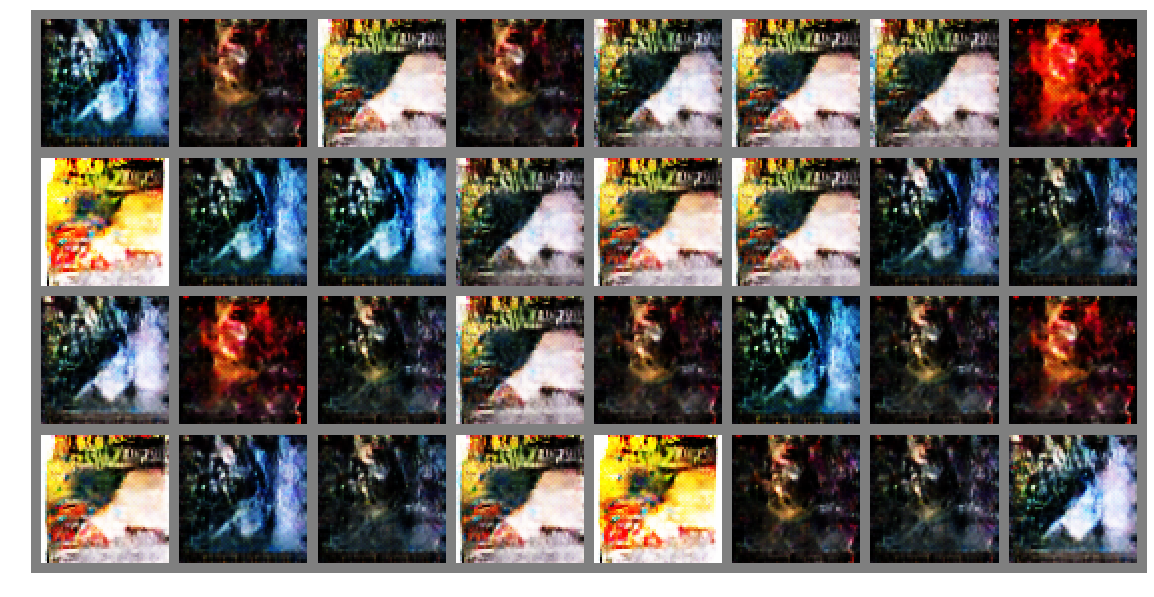

In [99]:
fake=fake.cpu()
show(make_grid(fake.data, padding=5))

In [98]:
!zip -r results.zip dcgan_results

updating: dcgan_results/ (stored 0%)
updating: dcgan_results/netG_epoch_99.pth (deflated 7%)
updating: dcgan_results/real_samples.png (deflated 0%)
updating: dcgan_results/netD_epoch_99.pth (deflated 7%)
updating: dcgan_results/netG_epoch_999.pth (deflated 7%)
updating: dcgan_results/netD_epoch_999.pth (deflated 7%)


In [0]:
mkdir subset

In [0]:
mkdir subset8

In [140]:
mv dcgan_results/fake_samples_epoch_0* subset/

mv: cannot stat 'dcgan_results/fake_samples_epoch_0*': No such file or directory


In [0]:
mv subset/fake_samples_epoch_2* subset8/

In [147]:
ls subset7/

fake_samples_epoch_000.png  fake_samples_epoch_100.png
fake_samples_epoch_001.png  fake_samples_epoch_101.png
fake_samples_epoch_002.png  fake_samples_epoch_102.png
fake_samples_epoch_003.png  fake_samples_epoch_103.png
fake_samples_epoch_004.png  fake_samples_epoch_104.png
fake_samples_epoch_005.png  fake_samples_epoch_105.png
fake_samples_epoch_006.png  fake_samples_epoch_106.png
fake_samples_epoch_007.png  fake_samples_epoch_107.png
fake_samples_epoch_008.png  fake_samples_epoch_108.png
fake_samples_epoch_009.png  fake_samples_epoch_109.png
fake_samples_epoch_010.png  fake_samples_epoch_110.png
fake_samples_epoch_011.png  fake_samples_epoch_111.png
fake_samples_epoch_012.png  fake_samples_epoch_112.png
fake_samples_epoch_013.png  fake_samples_epoch_113.png
fake_samples_epoch_014.png  fake_samples_epoch_114.png
fake_samples_epoch_015.png  fake_samples_epoch_115.png
fake_samples_epoch_016.png  fake_samples_epoch_116.png
fake_samples_epoch_017.png  fake_samples_epoch_117.png
fake_sampl

In [153]:
!zip -r subset8.zip subset8

  adding: subset8/ (stored 0%)
  adding: subset8/fake_samples_epoch_274.png (deflated 0%)
  adding: subset8/fake_samples_epoch_262.png (deflated 0%)
  adding: subset8/fake_samples_epoch_256.png (deflated 0%)
  adding: subset8/fake_samples_epoch_294.png (deflated 0%)
  adding: subset8/fake_samples_epoch_295.png (deflated 0%)
  adding: subset8/fake_samples_epoch_281.png (deflated 0%)
  adding: subset8/fake_samples_epoch_222.png (deflated 0%)
  adding: subset8/fake_samples_epoch_223.png (deflated 0%)
  adding: subset8/fake_samples_epoch_220.png (deflated 0%)
  adding: subset8/fake_samples_epoch_230.png (deflated 0%)
  adding: subset8/fake_samples_epoch_296.png (deflated 0%)
  adding: subset8/fake_samples_epoch_228.png (deflated 0%)
  adding: subset8/fake_samples_epoch_249.png (deflated 0%)
  adding: subset8/fake_samples_epoch_210.png (deflated 0%)
  adding: subset8/fake_samples_epoch_203.png (deflated 0%)
  adding: subset8/fake_samples_epoch_229.png (deflated 0%)
  adding: subset8/fake_sa

In [149]:
ls -lh subset7.zip


-rw-r--r-- 1 root root 60M Apr 29 22:00 subset7.zip


In [0]:
from google.colab import files
files.download('subset8.zip')
